### Business Problem Overview**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Business Objective

To predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

<table><tr><th></th><th>Acronyms</th><th>Descriptions</th></tr>
<tr><td>0</td><td>*.6</td><td>KPI for the month of June</td></tr>
<tr><td>1</td><td>*.7</td><td>KPI for the month of July</td></tr>
<tr><td>2</td><td>*.8</td><td>KPI for the month of August</td></tr>
<tr><td>3</td><td>*.9</td><td>KPI for the month of September</td></tr>
<tr><td>4</td><td>2G</td><td>2G network</td></tr>
<tr><td>5</td><td>3G</td><td>3G network</td></tr>
<tr><td>6</td><td>AMT</td><td>Amount in local currency</td></tr>
<tr><td>7</td><td>AON</td><td>Age on network - number of days the customer is using the operator T network</td></tr>
<tr><td>8</td><td>ARPU</td><td>Average revenue per user</td></tr>
<tr><td>9</td><td>AV</td><td>Average</td></tr>
<tr><td>10</td><td>CIRCLE_ID</td><td>Telecom circle area to which the customer belongs to</td></tr>
<tr><td>11</td><td>DATA</td><td>Mobile internet</td></tr>
<tr><td>12</td><td>FB_USER</td><td>Service scheme to avail services of Facebook and similar social networking sites</td></tr>
<tr><td>13</td><td>IC</td><td>Incoming calls</td></tr>
<tr><td>14</td><td>ISD</td><td>ISD calls</td></tr>
<tr><td>15</td><td>LOC</td><td>Local calls - within same telecom circle</td></tr>
<tr><td>16</td><td>MAX</td><td>Maximum</td></tr>
<tr><td>17</td><td>MOBILE_NUMBER</td><td>Customer phone number</td></tr>
<tr><td>18</td><td>MONTHLY</td><td>Service schemes with validity equivalent to a month</td></tr>
<tr><td>19</td><td>MOU</td><td>Minutes of usage - voice calls</td></tr>
<tr><td>20</td><td>NIGHT</td><td>Scheme to use during specific night hours only</td></tr>
<tr><td>21</td><td>NUM</td><td>Number</td></tr>
<tr><td>22</td><td>OFFNET</td><td>All kind of calls outside the operator T network</td></tr>
<tr><td>23</td><td>OG</td><td>Outgoing calls</td></tr>
<tr><td>24</td><td>ONNET</td><td>All kind of calls within the same operator network</td></tr>
<tr><td>25</td><td>PCK</td><td>Prepaid service schemes called - PACKS</td></tr>
<tr><td>26</td><td>RECH</td><td>Recharge</td></tr>
<tr><td>27</td><td>ROAM</td><td>Indicates that customer is in roaming zone during the call</td></tr>
<tr><td>28</td><td>SACHET</td><td>Service schemes with validity smaller than a month</td></tr>
<tr><td>29</td><td>SPL</td><td>Special calls</td></tr>
<tr><td>30</td><td>STD</td><td>STD calls - outside the calling circle</td></tr>
<tr><td>31</td><td>T2C</td><td>Operator T to it’s own call center</td></tr>
<tr><td>32</td><td>T2F</td><td>Operator T to fixed lines of T</td></tr>
<tr><td>33</td><td>T2M</td><td>Operator T to other operator mobile</td></tr>
<tr><td>34</td><td>T2O</td><td>Operator T to other operator fixed line</td></tr>
<tr><td>35</td><td>T2T</td><td>Operator T to T, i.e. within same operator (mobile to mobile)</td></tr>
<tr><td>36</td><td>VBC</td><td>Volume based cost - when no specific scheme is not purchased and paid as per usage</td></tr>
<tr><td>37</td><td>VOL</td><td>Mobile internet usage volume (in MB)</td></tr></table>

In [1]:
#import necessary packae/library needed for this assignment
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt

from datetime import datetime , timedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting max column size to view all column data
pd.set_option("display.max_rows", 230)
pd.set_option("display.max_columns", 230)

### DATA LOAD

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#lets load the CSV data
telecom_data=pd.read_csv('/kaggle/input/telecom-churn/telecom_churn_data.csv',engine='python')

#lets now check for the info of the loaded CSV
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
#lets see how the loaded data looks
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
#Lets pull out all features having Object as datatype
object_columns=telecom_data.select_dtypes(['object']).columns
telecom_data[list(object_columns)].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   
2           8/14/2014           9/29/2014                      NaN   
3           8/31/2014           9/30/2014                      NaN   
4            8/9/2014           9/28/2014                 6/4/2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014                      NaN  
1                7/25/2014                8/10/2014                      NaN  
2                      NaN                      NaN                9/17/2014  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [6]:
print(object_columns)
#We notice that above Object columns are all date and hence can be converted to date Format

for date_col in object_columns:
    telecom_data[date_col]=pd.to_datetime(telecom_data[date_col], format='%m/%d/%Y')
    
#Now that we converted the datatype to Datetime, lets again check the info of the dataframe
telecom_data.info()

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


In [7]:
# lets rename the column month names to month number
telecom_data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

### DATA PREPERATION

Lets Clean up some features to extract high value customers based on the recharge amount and recharge data

In [8]:
#lets drop Mobile Number as its only unique
telecom_data.drop('mobile_number',axis=1,inplace=True)

In [9]:
#lets pull out all the features related to recharge
recharge_cols=telecom_data.columns[telecom_data.columns.str.contains('rech_amt|rech_data')]
telecom_data[list(recharge_cols)].head()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0               362               252               252                 0   
1                74               384               283               121   
2               168               315               116               358   
3               230               310               601               410   
4               196               350               287               200   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0             252             252             252               0   
1              44             154              65              50   
2              86             200              86             100   
3              60              50              50              50   
4              56             110             110              50   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  \
0               2014-06-21               2014-07-16               2014-08-08   
1                      NaT               2014-07-25               2014-08-10   
2                      NaT                      NaT                      NaT   
3                      NaT                      NaT                      NaT   
4               2014-06-04                      NaT                      NaT   

  date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  \
0                      NaT                1.0                1.0   
1                      NaT                NaN                1.0   
2               2014-09-17                NaN                NaN   
3                      NaT                NaN                NaN   
4                      NaT                1.0                NaN   

   total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  \
0                1.0                NaN            252.0            252.0   
1                2.0                NaN              NaN            154.0   
2                NaN                1.0              NaN              NaN   
3                NaN                NaN              NaN              NaN   
4                NaN                NaN             56.0              NaN   

   max_rech_data_8  max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
0            252.0              NaN               252.0               252.0   
1             25.0              NaN                 NaN               154.0   
2              NaN             46.0                 NaN                 NaN   
3              NaN              NaN                 NaN                 NaN   
4              NaN              NaN                56.0                 NaN   

   av_rech_amt_data_8  av_rech_amt_data_9  
0               252.0                 NaN  
1                50.0                 NaN  
2                 NaN                46.0  
3                 NaN                 NaN  
4                 NaN                 NaN

We obsere NAN under `Average data amount` Column, Hence for the dependent columns to be valid, NAN needs to be present under `Max recharge data` and `total recharge data`

Now lets validate this use case

In [10]:
print(telecom_data.loc[telecom_data['av_rech_amt_data_6'].isnull(),['av_rech_amt_data_6','max_rech_data_6','total_rech_data_6']].sum())
print('\n',telecom_data.loc[telecom_data['av_rech_amt_data_7'].isnull(),['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].sum())
print('\n',telecom_data.loc[telecom_data['av_rech_amt_data_8'].isnull(),['av_rech_amt_data_8','max_rech_data_8','total_rech_data_8']].sum())
print('\n',telecom_data.loc[telecom_data['av_rech_amt_data_9'].isnull(),['av_rech_amt_data_9','max_rech_data_9','total_rech_data_9']].sum())

av_rech_amt_data_6    0.0
max_rech_data_6       0.0
total_rech_data_6     0.0
dtype: float64

 av_rech_amt_data_7    0.0
max_rech_data_7       0.0
total_rech_data_7     0.0
dtype: float64

 av_rech_amt_data_8    0.0
max_rech_data_8       0.0
total_rech_data_8     0.0
dtype: float64

 av_rech_amt_data_9    0.0
max_rech_data_9       0.0
total_rech_data_9     0.0
dtype: float64


All 3 Columns are in Sync for NAN data and lets impute NAN with 0 to proceed with further Analysis

In [11]:
#Method to impute specific Col_name with impute_val passed as argument
def impute_value(col_name,impute_val):
    telecom_data[col_name+'_6'].fillna(impute_val,inplace=True)
    telecom_data[col_name+'_7'].fillna(impute_val,inplace=True)
    telecom_data[col_name+'_8'].fillna(impute_val,inplace=True)
    telecom_data[col_name+'_9'].fillna(impute_val,inplace=True)

In [12]:
impute_value('av_rech_amt_data',0)
impute_value('max_rech_data',0)
impute_value('total_rech_data',0)

In [13]:
print(telecom_data.shape)
telecom_data.drop_duplicates(inplace=True)
print(telecom_data.shape)

(99999, 225)
(99999, 225)


#### 1. DERIVED FEATURES

Now lets derive the Total data recharge based on total_rech_data and av_rech_amt_data

In [14]:
# Multiplying total recharge data and avergae recharge amount for data
telecom_data['total_data_rech_6']=telecom_data['total_rech_data_6']*telecom_data['av_rech_amt_data_6']
telecom_data['total_data_rech_7']=telecom_data['total_rech_data_7']*telecom_data['av_rech_amt_data_7']
telecom_data['total_data_rech_8']=telecom_data['total_rech_data_8']*telecom_data['av_rech_amt_data_8']

## We are not perfroming this for month 9 as its our target month
# adding total recharge amount with total data rechrage to obtain overall recharge amount for month
telecom_data['total_rech_6']=telecom_data['total_data_rech_6']+telecom_data['total_rech_amt_6']
telecom_data['total_rech_7']=telecom_data['total_data_rech_7']+telecom_data['total_rech_amt_7']
telecom_data['total_rech_8']=telecom_data['total_data_rech_8']+telecom_data['total_rech_amt_8']


We can derieved columns for total minutes of usage for each month

In [15]:
#Get list of all mins of usage columns
minutes_of_usage_cols = [cols for cols in telecom_data.columns.tolist() if 'mou' in cols]

# If mins of usage is NAN we can fill it with 0
telecom_data[minutes_of_usage_cols] = telecom_data[minutes_of_usage_cols].apply(lambda x: x.fillna(0))

# Deriving columns for total minutes of usage on each month
# Adding minutes of usage for incoming and outgoing 
telecom_data['total_mou_6'] = telecom_data['total_og_mou_6'] + telecom_data['total_ic_mou_6']
telecom_data['total_mou_7'] = telecom_data['total_og_mou_7'] + telecom_data['total_ic_mou_7']
telecom_data['total_mou_8'] = telecom_data['total_og_mou_8'] + telecom_data['total_ic_mou_8']

**Lets derive some Features out of the Last Recharge date Columns**

In [16]:
#method to calculate the days since last recharge
def last_recharge_days(cols,col_name):
    
    #get the last recharge date
    telecom_data['last_rech_date'] = telecom_data[cols].max(axis=1)

    #Now lets get the no of days since last recharge as we are restricted till 8th month, we subract from 31st Aug
    telecom_data[col_name] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - telecom_data['last_rech_date'] ).astype('timedelta64[D]'))
    
    telecom_data.drop('last_rech_date',axis=1,inplace=True)
    
    #impute the missing values with 0
    telecom_data[col_name] = telecom_data[col_name].fillna(0)

In [17]:
# listing the date of last recharge for imputation
rech_date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
last_recharge_days(rech_date_cols,'days_since_last_rech')

# listing the date of last data recharge for imputation
rech_data_date_cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
last_recharge_days(rech_data_date_cols,'days_since_last_data_rech')

Lets also derive a column to see if a customr has reached in a month

In [18]:
# deriving columns as boolean for 1 if customer has recharged and 0 if customer has not recharged
telecom_data['rech_6'] = np.where(telecom_data[['date_of_last_rech_6','date_of_last_rech_data_6']].apply(pd.isnull).astype(int).sum(axis=1) > 0, 1, 0)
telecom_data['rech_7'] = np.where(telecom_data[['date_of_last_rech_7','date_of_last_rech_data_7']].apply(pd.isnull).astype(int).sum(axis=1) > 0, 1, 0)
telecom_data['rech_8'] = np.where(telecom_data[['date_of_last_rech_8','date_of_last_rech_data_8']].apply(pd.isnull).astype(int).sum(axis=1) > 0, 1, 0)

We need to drop the columns that no longer need as we have derieved some information in a new column

In [19]:
#We no longer need these date cols and hence we can drop them
telecom_data.drop(rech_date_cols,axis=1,inplace=True)

telecom_data.drop(rech_data_date_cols,axis=1,inplace=True)

telecom_data.shape

(99999, 233)

lets calculate the date from which the customer is using the service

In [20]:
# since we have our data till the month of September we will set the 
# current date as the last day of September
current_date = datetime.strptime('Sep\xa030 2014', '%b\xa0%d %Y')

In [21]:
telecom_data.aon.head()

0     968
1    1006
2    1103
3    2491
4    1526
Name: aon, dtype: int64

In [22]:
# calulate the date first available
telecom_data['date_fst_atv'] = current_date - telecom_data.aon.apply(timedelta)

In [23]:
telecom_data['date_fst_atv'].head()

0   2012-02-05
1   2011-12-29
2   2011-09-23
3   2007-12-05
4   2010-07-27
Name: date_fst_atv, dtype: datetime64[ns]

In [24]:
telecom_data['customer_group'] = pd.cut(telecom_data['date_fst_atv'],bins=3)
telecom_data['customer_group'].value_counts()

(2010-06-17 08:00:00, 2014-04-03]                    71122
(2006-08-31 16:00:00, 2010-06-17 08:00:00]           21143
(2002-11-10 20:13:55.200000, 2006-08-31 16:00:00]     7734
Name: customer_group, dtype: int64

In [25]:
telecom_data['customer_group']

0                        (2010-06-17 08:00:00, 2014-04-03]
1                        (2010-06-17 08:00:00, 2014-04-03]
2                        (2010-06-17 08:00:00, 2014-04-03]
3               (2006-08-31 16:00:00, 2010-06-17 08:00:00]
4                        (2010-06-17 08:00:00, 2014-04-03]
                               ...                        
99994    (2002-11-10 20:13:55.200000, 2006-08-31 16:00:00]
99995           (2006-08-31 16:00:00, 2010-06-17 08:00:00]
99996                    (2010-06-17 08:00:00, 2014-04-03]
99997                    (2010-06-17 08:00:00, 2014-04-03]
99998                    (2010-06-17 08:00:00, 2014-04-03]
Name: customer_group, Length: 99999, dtype: category
Categories (3, interval[datetime64[ns]]): [(2002-11-10 20:13:55.200000, 2006-08-31 16:00:00] < (2006-08-31 16:00:00, 2010-06-17 08:00:00] < (2010-06-17 08:00:00, 2014-04-03]]

In [26]:
code, _ = pd.factorize(telecom_data['customer_group'],sort=True)
telecom_data['customer_group'] = pd.Series(code)
telecom_data['customer_group']

0        2
1        2
2        2
3        1
4        2
        ..
99994    0
99995    1
99996    2
99997    2
99998    2
Name: customer_group, Length: 99999, dtype: int64

In [27]:
print(telecom_data.shape)
#Lets now drop the columns that we no longer use
#telecom_data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],inplace=True,axis=1)
#telecom_data.shape

(99999, 235)


#### 2. FILTER HIGH-VALUED CUSTOMERS

In [28]:
#Now lets find the average of month 6 and 7 and place it in a column
telecom_data['av_rech_good_phase']=(telecom_data['total_rech_6']+telecom_data['total_rech_7'])/2

In [29]:
rech_70th_perc=np.percentile(telecom_data['av_rech_good_phase'],70)
print(rech_70th_perc)

#Now lets filter out high value customers using the 70th percentile and save it to our DF
telecom_data=telecom_data[telecom_data['av_rech_good_phase']>=rech_70th_perc]

print(telecom_data.shape)

478.0
(30001, 236)


We get close to 29.9K records as provided in the assignment

#### 3. CHURN PREDICTION

Lets predict the Churn Customers based on `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9`, `vol_3g_mb_9`

In [30]:
#lets see the missing values in these Feature columns
month_9_cols=['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
telecom_data[month_9_cols].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

A Customer is considered to have Churned if Sum of all of these above mentioned Features is 0

In [31]:
telecom_data['churn']=np.where(telecom_data[month_9_cols].sum(axis=1)==0, 1,0)

In [32]:
telecom_data['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

We see a lesser percent of churn data and Thus it falls under Class imbalance probllem, which we will handle in the upcoming blocks

### DATA CLEANUP

Since Month 9 acts as Target Column and as we are predicting Churn for that month , we no longer require Features representing 9th month and lets go ahead and drop them

In [33]:
month_9_cols_drop=telecom_data.columns[telecom_data.columns.str.contains('_9')]
print(month_9_cols_drop)

telecom_data.drop(month_9_cols_drop,axis=1,inplace=True)
print(telecom_data.shape)

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

Lets go ahead and drop the Single value Columns First as it provides no use full information for prediction

In [34]:
single_val_cols=list(filter(lambda x : len(telecom_data[x].value_counts()) < 2, telecom_data.columns))
single_val_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [35]:
telecom_data.drop(single_val_cols,axis=1,inplace=True)

In [36]:
telecom_data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

Lets also differentiate the Categorical and Numerical Columns 

In [37]:
# Extration columns specific to fb_user|night|sachet|monthly|pck|churn for the available features
cat_cols=telecom_data.columns[telecom_data.columns.str.contains('fb_user|night|sachet|monthly|pck|churn')].tolist()
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn']

In [38]:
# Extracting the names of all numeric columns 
numeric_cols=[x for x in telecom_data.columns if (x not in cat_cols and x not in object_columns)]
numeric_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [39]:
#Method to check missing vlaues percentage
def missing_vals(df,threshold=0.0):
    return pd.DataFrame(100 * (df.isnull().sum()/df.shape[0])).sort_values(by=0,ascending=False)\
            .set_axis(['Missing_Percentage'],axis=1).query('Missing_Percentage > {}'.format(threshold))
#return dataframe with missing value % which is more than the specified threshold

Lets see the missing values in these Categorical Columns

In [40]:
#Lets see the missing values of Categorical Columns which has more than 30% missing values
missing_vals(telecom_data[cat_cols],30.0)

Missing_Percentage
night_pck_user_8           46.825106
fb_user_8                  46.825106
night_pck_user_6           44.148528
fb_user_6                  44.148528
fb_user_7                  43.145228
night_pck_user_7           43.145228

In [41]:
#Not imputing with 0 as its already present as one of the data in the Categorical columns
#lets impute the missing values in these columns with -1 
telecom_data[cat_cols] = telecom_data[cat_cols].apply(lambda x: x.fillna(-1))

In [42]:
missing_val_df=missing_vals(telecom_data[numeric_cols])
missing_val_df

Missing_Percentage
arpu_2g_8                 46.825106
count_rech_2g_8           46.825106
count_rech_3g_8           46.825106
arpu_3g_8                 46.825106
count_rech_2g_6           44.148528
count_rech_3g_6           44.148528
arpu_3g_6                 44.148528
arpu_2g_6                 44.148528
count_rech_2g_7           43.145228
arpu_3g_7                 43.145228
arpu_2g_7                 43.145228
count_rech_3g_7           43.145228
ic_others_8                3.913203
og_others_8                3.913203
og_others_6                1.816606
ic_others_6                1.816606
ic_others_7                1.789940
og_others_7                1.789940

Lets impute the missing values in the Numerical columns with 0

In [43]:
#lets impute the missing values in these columns with 0
telecom_data[numeric_cols] = telecom_data[numeric_cols].apply(lambda x: x.fillna(0))

In [44]:
missing_vals(telecom_data)

Empty DataFrame
Columns: [Missing_Percentage]
Index: []

Now we have clean data with no columns having missing values 

Lets try to find the most common value repetiton in each column with its percentage of occurance

In [45]:
#Method to get the list of all columns (whose max category's value count % is more than num%). 
def show_unique_column_values(df_var,num):
    unique_col_dict={}
    for col_unique in df_var.columns:
        #biased_data=len(df_var[col_unique].unique())
        biased_data=round((df_var[col_unique].value_counts(dropna=False).max()/df_var.shape[0])*100,2) #pull the category with max count in the column
        if(biased_data>=num and col_unique!='churn'):
            unique_col_dict[col_unique]=biased_data
    df_final=pd.DataFrame(unique_col_dict.items())
    df_final.columns=['cols','percent']
    return df_final

In [46]:
#Lets pull out all the columns with biased data where one category is occupying more than 80% of the data in that column
most_repeated_data_cols=show_unique_column_values(telecom_data,80)
most_repeated_data_cols=most_repeated_data_cols.sort_values(by='percent',ascending=False)
most_repeated_data_cols

cols  percent
10       og_others_7    99.49
11       og_others_8    99.43
9       isd_og_mou_8    93.66
12      spl_ic_mou_7    93.31
8       isd_og_mou_7    92.56
7       isd_og_mou_6    92.19
13      spl_ic_mou_8    91.37
22       sachet_3g_8    91.13
21       sachet_3g_7    89.35
20       sachet_3g_6    89.22
16      monthly_2g_8    86.18
6   std_og_t2f_mou_8    85.95
19      monthly_3g_8    85.35
5   std_og_t2f_mou_7    85.27
4   std_og_t2f_mou_6    84.64
14      monthly_2g_6    84.64
17      monthly_3g_6    84.47
18      monthly_3g_7    84.35
15      monthly_2g_7    84.13
0      roam_ic_mou_7    83.12
2      roam_og_mou_7    82.93
3      roam_og_mou_8    82.29
1      roam_ic_mou_8    82.21

Since 80% of the values in the column are repeted with the same data we can drop this as its biased 

In [47]:
print(telecom_data.shape)
#lets go ahead and drop these biased columns
telecom_data.drop(list(most_repeated_data_cols.cols),axis=1,inplace=True)
#lets see the shape of DF 
print(telecom_data.shape)

(30001, 169)
(30001, 146)


Now that we have handled the missing values lets also make sure we have grouped the Categorical data accordingly

In [48]:
cat_cols=set(cat_cols).intersection(set(telecom_data.columns))

In [49]:
#method group Sachets into different sets
def group_sachets(x):
    
    if(int(x)<=5):
        return int(1)
    elif(int(x)<=10):
        return int(2)
    elif(int(x)<=15):
        return int(3)
    elif(int(x)<=20):
        return int(4)
    else:
        return int(5)


In [50]:
telecom_data['sachet_2g_6']=telecom_data['sachet_2g_6'].map(group_sachets)
telecom_data['sachet_2g_7']=telecom_data['sachet_2g_7'].map(group_sachets)
telecom_data['sachet_2g_8']=telecom_data['sachet_2g_8'].map(group_sachets)

## Outlier Treatment

Lets hadle the outliers by checking the skewness of the data and then remove the outlier that are above 0.999 quantile range

In [51]:
from scipy.stats import skew

In [52]:
# get all numeric columns
numeric_cols=[x for x in telecom_data.columns if (x not in cat_cols and x not in object_columns and x not in ['date_fst_atv'])]

# get the skewness of the numeric columns
skewed_feats = telecom_data[numeric_cols].apply(lambda x: skew(x.dropna())) #compute skewness

In [53]:
# sort the columns based on skewness
skewed_feats = skewed_feats.sort_values(ascending=False)

In [54]:
# loop thrugh the columns list
for index,value in zip(skewed_feats.index,skewed_feats):
    # if the skewness is above 5 then remove the values that are above 0.999 quantile
    if skew(telecom_data[index]) > 5:
        print(skew(telecom_data[index]),telecom_data.shape[0],sum(telecom_data[index] < telecom_data[index].quantile(0.999)))
        # set the filtered values to our dataset
        telecom_data = telecom_data[telecom_data[index] < telecom_data[index].quantile(0.999)]

110.05938219637805 30001 29971
58.71641876832461 29971 29941
27.88696346991112 29941 29911
39.76174604366884 29911 29881
41.53854473496572 29881 29849
36.01385908927279 29849 29819
19.286846186924066 29819 29789
31.877883126107772 29789 29759
19.149637919114824 29759 29729
15.70297888180917 29729 29699
16.51121776272859 29699 29669
25.87465514632002 29669 29639
26.449193621122838 29639 29609
21.59003841945976 29609 29579
22.834995679140214 29579 29549
5.81006667075731 29549 29519
16.471787237805643 29519 29489
20.621528637366204 29489 29459
10.889742361450285 29459 29429
18.803302099601595 29429 29399
19.91261447042967 29399 29369
6.991171518596454 29369 29339
8.922581518245257 29339 29309
8.551304094753215 29309 29279
12.378318501847037 29279 29249
11.803980253531444 29249 29219
14.1815426509002 29219 29189
7.613763536448425 29189 29159
5.664794979120501 29159 29129
8.079611813418353 29129 29099
6.820277833739918 29099 29069
6.165852614996767 29069 29039
5.222683041713081 29039 29009


## DATA VISUALISATION

In [55]:
sns.set_style('darkgrid') #setting background style for plots

#custom color
dark_green=(0.21568627450980393, 0.6366013071895424, 0.39869281045751637)
light_green=(0.5913725490196078, 0.8433371780084583, 0.7819761630142252)

#### TARGET COLUMN  VISUALISATION (CHURN)

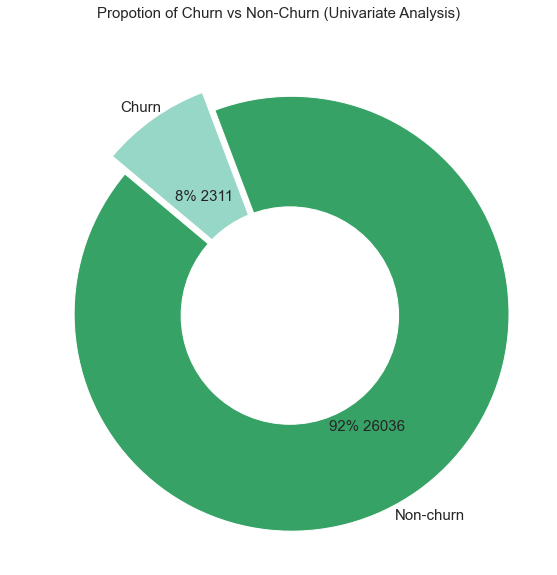

In [56]:
# Define a function for print text on each pie
def pie_label(val):
    return f'{val:.0f}% {val / 100 * len(telecom_data):.0f}'

# Create a Pie chart for Loan Status
plt.figure(figsize=(9,10))
ax = telecom_data.churn.value_counts().plot(kind='pie', autopct=pie_label,\
                        startangle=140,labels=['Non-churn','Churn'],colors=[dark_green,light_green],\
                        textprops={'fontsize': 15,'ha':'center','va':'top'},\
                        shadow=False, figsize=(10,10),explode=(0.1,0));

inner_circle=plt.Circle( (0.05,-0.09), 0.5, color='white')
ax.add_artist(inner_circle)
# if len(img):
#     ax.imshow(img,zorder=2,extent=[-0.4, 0.45, -0.55, 0.35],aspect='auto')

# set title and labels
plt.title("Propotion of Churn vs Non-Churn (Univariate Analysis)",size='15')
plt.ylabel('');

**Observation:**

- We notice a class imbalance problem where we have very minimal data with respect to Churn.

- We are taking care/handling of this Class imbalance in the upcoming blocks

Plotting Correlation with Target variable

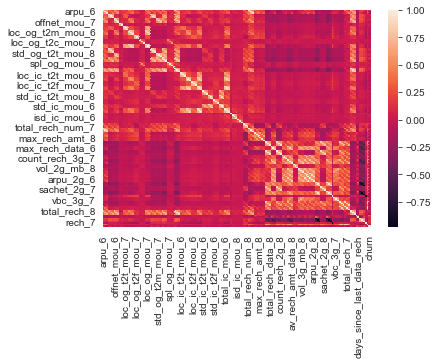

In [57]:
sns.heatmap(telecom_data.corr());

We are not able to observe clear view of the correlation since there are higher number of features, so lets split the features into group and check the correlation

In [58]:
def plot_correlation():
    # define subplot and figure size
    _, axes = plt.subplots(3,1,figsize=(30,15))
    
    # loop through each subplot
    for n,axis in enumerate(axes):
        
        cols = []
        
        # Get the features specific to each month
        cols = sorted([cols for cols in telecom_data.columns.tolist() if cols.endswith('_'+str(n+6))]) + ['churn']
        
        # Get the correlation and sort it in ascending order , Plot a bar chart for the data
        (telecom_data[cols].corr()['churn']*100).sort_values().drop('churn').plot(kind='bar',color=sns.color_palette('viridis',telecom_data[cols][:-1].shape[1]),ax=axis)
        
        # get the tick labels
        ticks = [tick for tick in axis.get_xticklabels()]
        
        # loop through each bar
        for i,patch in enumerate(axis.patches):
            
            # Get the tick label for each bar
            label = ticks[i].get_text()[:-2] if ticks[i].get_text() != 'churn' else ticks[i].get_text()
            
            # If the correlation is positive lop the tick label below else above
            if patch.get_height() < 0:
                axis.text(patch.get_x(),patch.get_height()-2,label,rotation=90,va='top')
                axis.text(patch.get_x(),3,round(patch.get_height(),1),ha='center')
            else:
                axis.text(patch.get_x(),patch.get_height()+3,label,rotation=90)
                axis.text(patch.get_x(),-5,round(patch.get_height(),1))
                
        # set x label , y label and y limit
        axis.set(xlabel='',ylabel='Correlation with Churn in %',ylim=(-50,50),xticklabels=[])
        axis.text((telecom_data[cols].shape[1]/2) - 2,25,'Month '+str(n+6),size=18)
        
    # plot X label and title    
    axes[2].text((telecom_data[cols].shape[1]/2) - 2,-60,'Feature Variables',size=15)
    plt.suptitle('Correlation btw Features and Churn variabale in %',x=0.5,y=0.9,size=25)
    
    # show plot
    plt.show()
    
    # Get the features which are not pecific to months
    cols = set(sorted([col for col in telecom_data.columns.tolist() if not (col[-2:] in ['_6','_7','_8']) and (telecom_data[col].dtype.name in ['float64','int64'])]) + ['churn'])
    
    
    # Get the correlation and sort it in ascending order , Plot a bar chart for the data
    ax = (telecom_data[cols].corr()['churn']*100).drop('churn').plot(kind='bar',color=sns.color_palette('viridis',len(cols)))
    
    # set x label , y label and y limit
    ax.set(ylabel='Correlation with Churn in %',ylim=(-50,50),title="Other Variables",xlabel='Features')
    
    # plot bar values
    for i,patch in enumerate(ax.patches):
        if patch.get_height() < 0:
            ax.text(patch.get_x()+0.1,3,round(patch.get_height(),1))
        else:
            ax.text(patch.get_x()+0.1,-5,round(patch.get_height(),1))
    1# show plot
    plt.show()

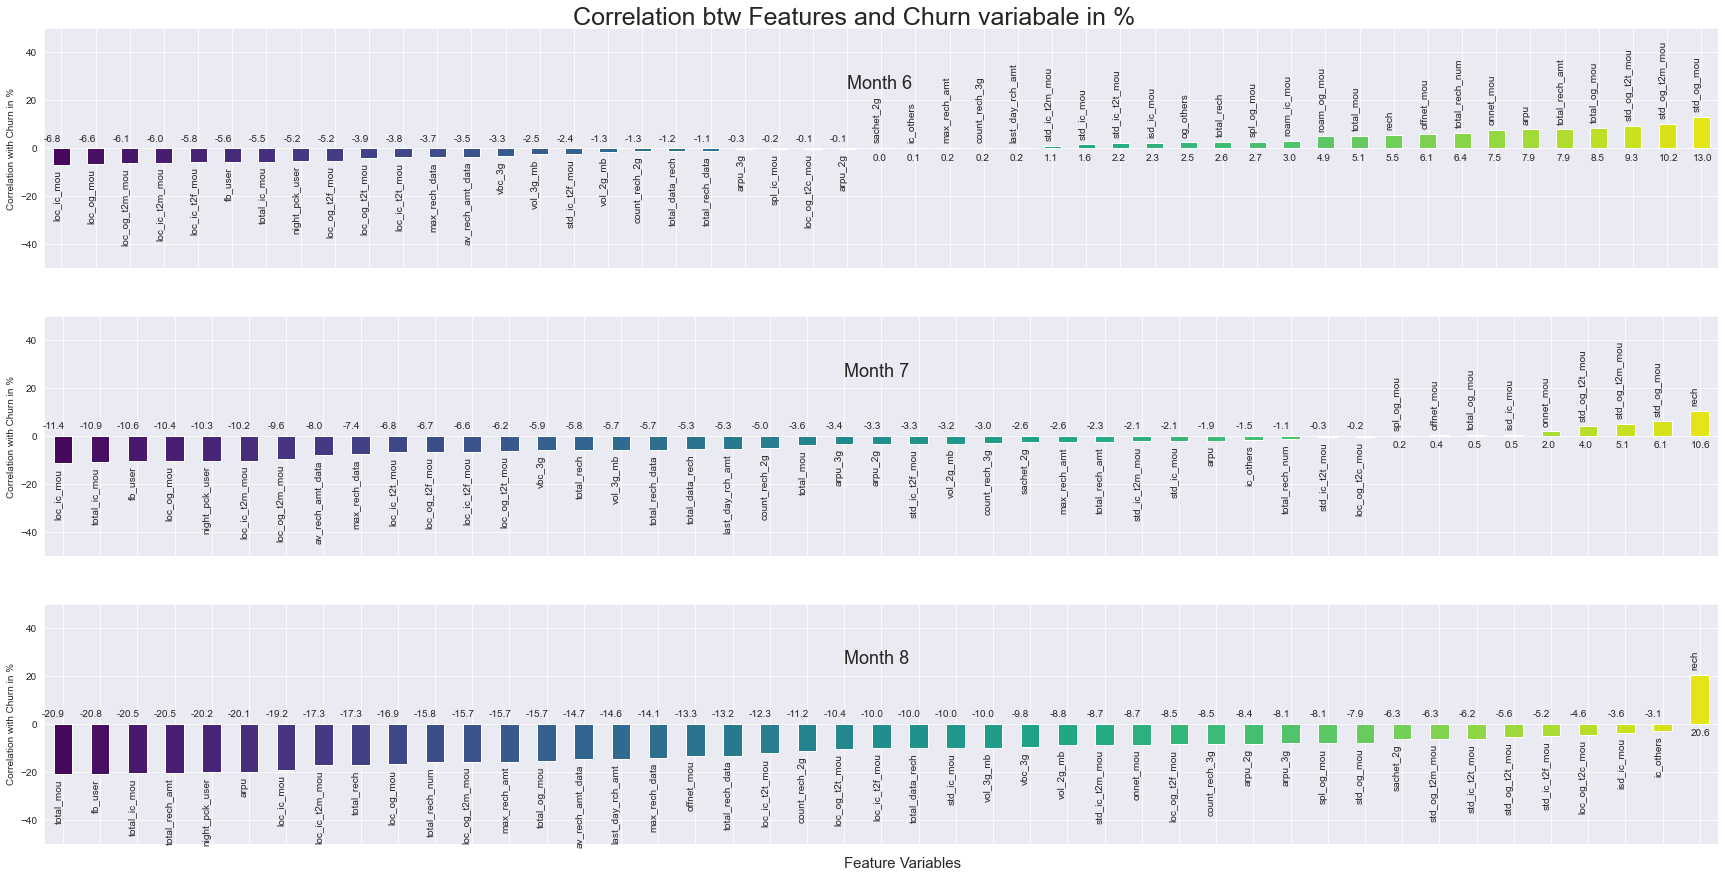

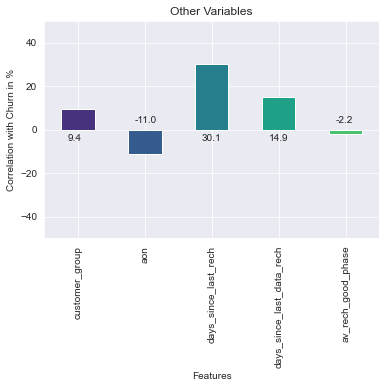

In [59]:
plot_correlation()

**Observations:**
 
- `Std_og_mou`, `loc_in_mou`, `rech` and `fb_user` are some of the highly correlated features with respect to Churn
 

- `aon`, `days since last recharge` and `days since last data recharge` are displaying higher correlation with Churn

In [60]:
# set the default color for the plots
sns.set(palette='Set2')

In [61]:
# Box plot 
def plot_box(col):
    # create subplots and set figuresize with shared y axis
    _, axes = plt.subplots(1,3,figsize=(20,4),sharey=True)

    # loop through each subplot    
    for n,axis in enumerate(axes):
        
        # create BoxPlot for churn vs the feature
        sns.boxplot(x='churn',y=col+'_'+str(n+6),data=telecom_data,ax=axis,showfliers=False);
        
        # set title, xlabel and ylabel
        axis.set(title='Month '+str(n+6), xlabel=col,ylabel='Count')
        
    # set subplot title
    plt.suptitle(str.title(col) +' vs Churn')
    
def plot_hist(col):
    # create subplots and set figuresize with shared y axis
    _, axes = plt.subplots(1,3,figsize=(20,4),sharey=True)

    # loop through each subplot    
    for n,axis in enumerate(axes):
        
        # create histogram plot
        sns.histplot(x=col+'_'+str(n+6),hue='churn',data=telecom_data,bins=15,ax=axis);
        
        # set title, xlabel and ylabel
        axis.set(title='Month '+str(n+6), xlabel=col,ylabel='Count')
        
    # set subplot title
    plt.suptitle(str.title(col) +' vs Churn')
    
def plot_scatter(col):
    # create subplots and set figuresize with shared y axis
    _, axes = plt.subplots(1,3,figsize=(20,4))

    # loop through each subplot    
    for n,axis in enumerate(axes):
        
        # create scatterplot
        sns.scatterplot(x=col+'_'+str(n+6),y='total_rech_'+str(n+6),hue='churn',data=telecom_data,ax=axis,alpha=0.8);
        
        # set title, xlabel and ylabel
        axis.set(title='Month '+str(n+6), xlabel=col, ylabel='Total Recharge Value')
        
    # set subplot title
    plt.suptitle(str.title(col) +' vs Total Recharge Value')

def plot_bar(col,segment=True):
    # create subplots and set figuresize with shared y axis
    _, axes = plt.subplots(1,3,figsize=(20,4),sharey=True)

    # loop through each subplot    
    for n,axis in enumerate(axes):
        if segment:
            x_data = pd.cut(telecom_data[col+'_'+str(n+6)].astype(int),bins=3)
            
        else:
            x_data = telecom_data[col+'_'+str(n+6)]
            
        # create bar plot
        sns.barplot(y='total_rech_'+str(n+6), x=x_data,data=telecom_data,ci=None,hue='churn',ax=axis)
        
        # set title, xlabel and ylabel
        axis.set(title='Month '+str(n+6), xlabel=col, ylabel='Total Recharge Value')
        
    # set subplot title
    plt.suptitle(str.title(col) +' vs Total Recharge Value')
    
def plot_graphs(col):
    plot_box(col)
    plot_hist(col)
    plot_scatter(col)
    plot_bar(col)

### CATEGORICAL DATA VISUALISATION

#### GENERIC METHODS FOR CATEGORICAL DATA VISUALISATION

In [62]:
#Method for setting value at top of each bar in Count Plot
def display_val(ax,bar_h,f_size,percentage):
    rects=ax.patches
    for rect in rects:
        r_height=rect.get_height()
        if(r_height!=0.0 and r_height>0):
            ax.text(rect.get_x()+rect.get_width()/2,bar_h*r_height,str(int(r_height))+percentage,ha='center',va='bottom',fontsize=f_size)

In [63]:
## Generic Method for Categorical columns to display distplot
def distplot_com(col_name,fsize):
    
    # create subplots and set figure size
    fig , ax = plt.subplots(1,2,figsize=(15,5))
    
    # create stacked bar for feature
    #telecom_data.groupby([col_name])['churn'].value_counts().unstack().plot(kind='bar',stacked=True,ax=ax[0],width=1.0,color=[(0.21568627450980393, 0.6366013071895424, 0.39869281045751637),(0.5913725490196078, 0.8433371780084583, 0.7819761630142252)])
    sns.countplot(x=col_name,hue='churn',data=telecom_data,ax=ax[0])   
    
    display_val(ax[0],1,fsize,"")
    
    # creating a bar chart showing percentage ratio of churn for each categorical value
    category_table=telecom_data.groupby([col_name,'churn'])[col_name].count().unstack('churn').T
    ((category_table/category_table.sum()).round(2)*100).T.plot.bar(stacked=False,ax=ax[1],width=0.8)
    
    # annotate bar values
    display_val(ax[1],1,fsize,"%")
        
    # set margins
    ax[1].margins(0.05,0.05)
    
    #set title for each of the sub-plot
    #plt.suptitle("Bivariate Analysis on "+str(col_name).upper(),size=18,y=1.03)
    ax[0].set_title("Number of Churn in each "+str(col_name).upper(),size=13)
    ax[1].set_title("Percentage Ratio of Churn in each category of "+str(col_name).upper(),size=13)
    ax[0].set_xlabel(str(col_name).upper())
    ax[1].set_xlabel(str(col_name).upper())

    
    # make the plot tight layout
    plt.tight_layout()
    
    plt.show()
    

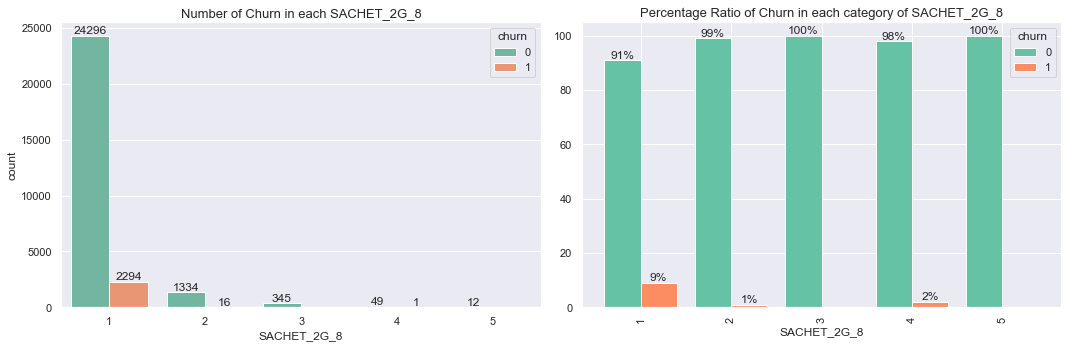

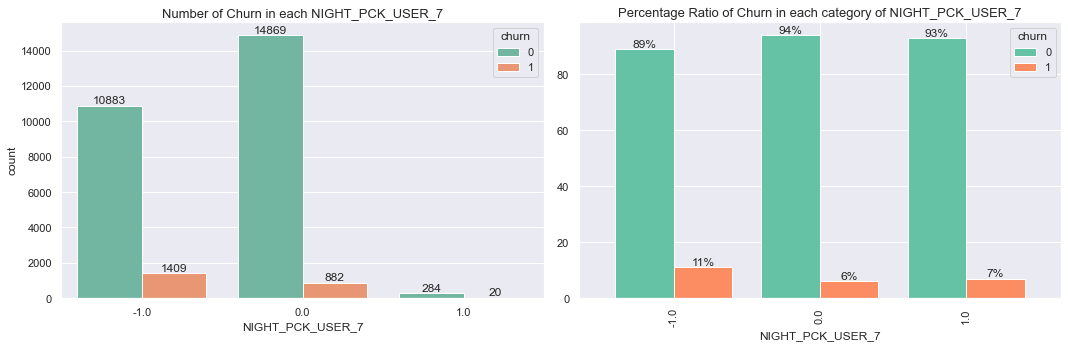

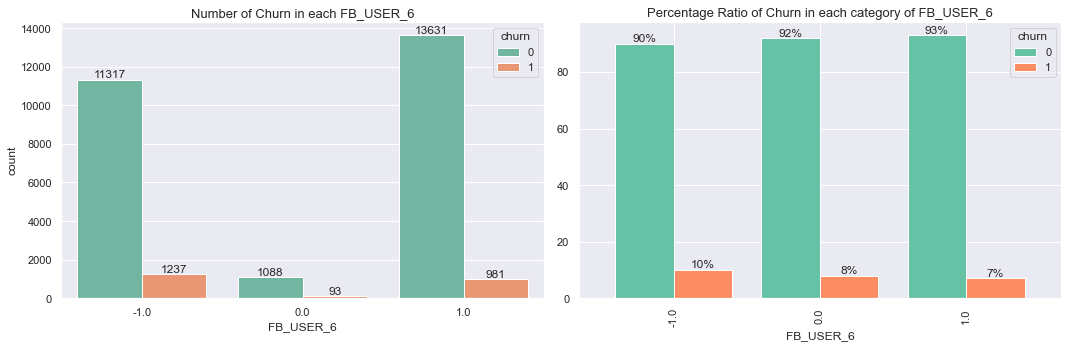

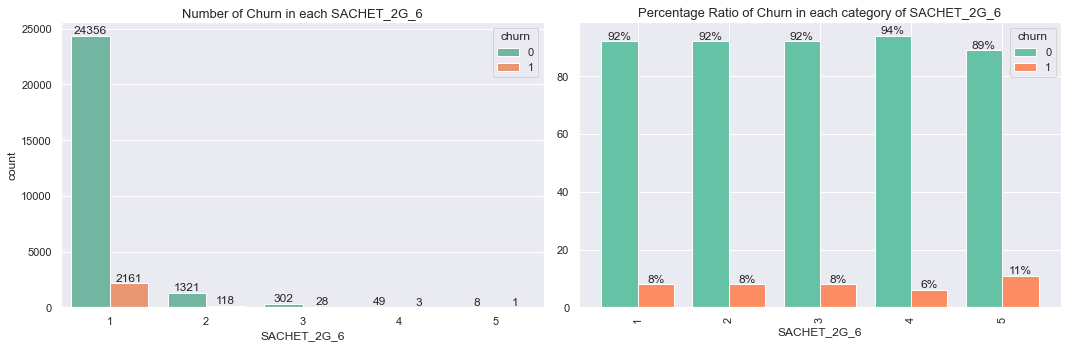

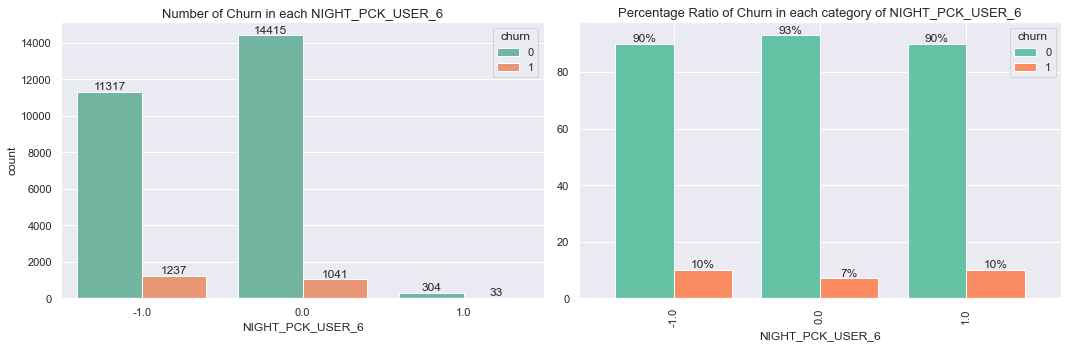

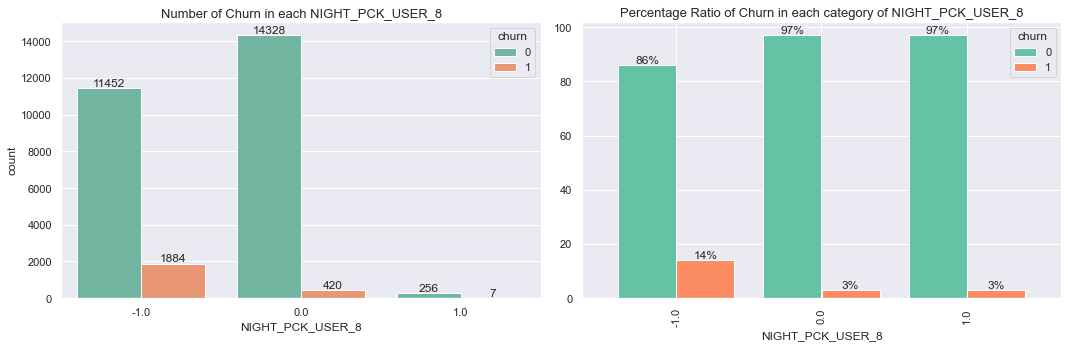

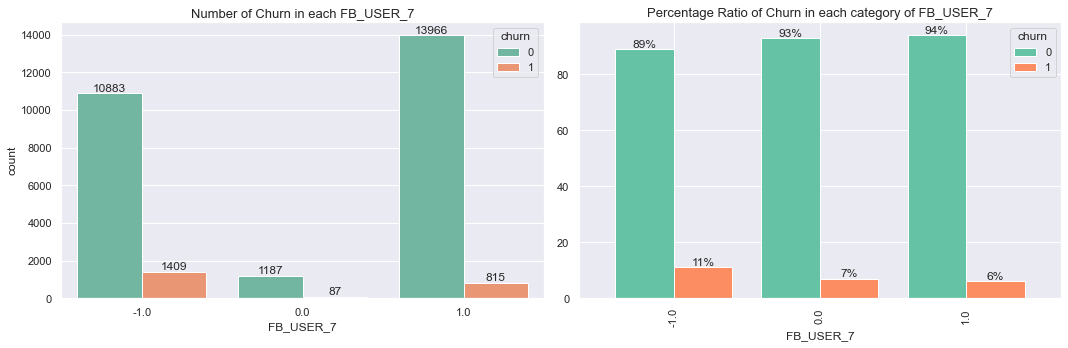

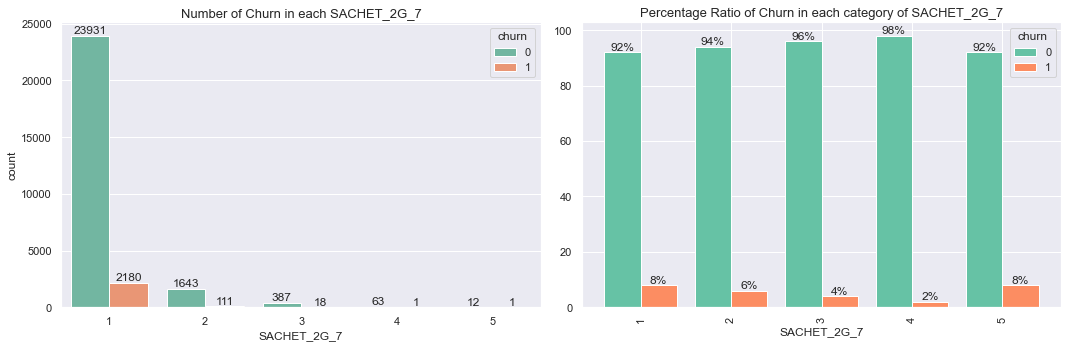

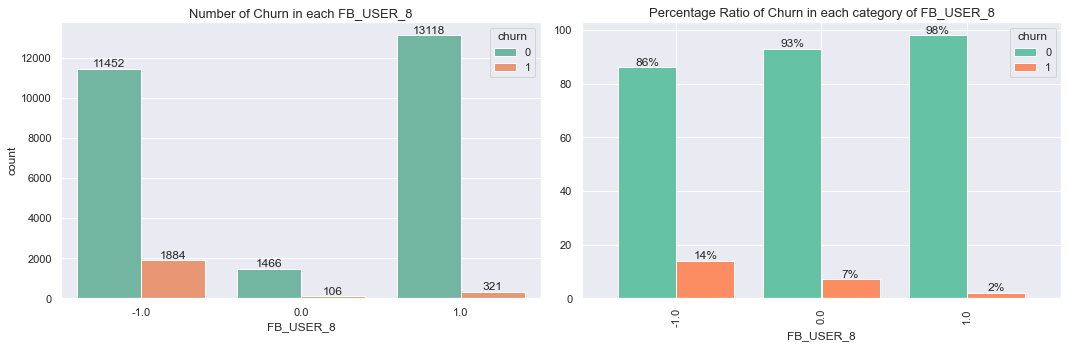

In [64]:
#lets sort the Categorical columns
list(cat_cols).sort()

#iterate different categorical columns 
for cols in cat_cols:
    #count plot and percentage ratio of churn for each of the categorical cols
    if(cols!='churn'):
        distplot_com(cols,12)

**Observations:**
 
- Over a period of 3 months, there is an increase in number of users utlising different `sachet schemes`
 

- Users opting for `night pack scheme` under scheme 0 and 1 also shows an increase over 3 months along with decrease in Churn rate
 

- here is an increase in no of users using different `Fb_users` scheme which is accompanied by decrease in Churn rate

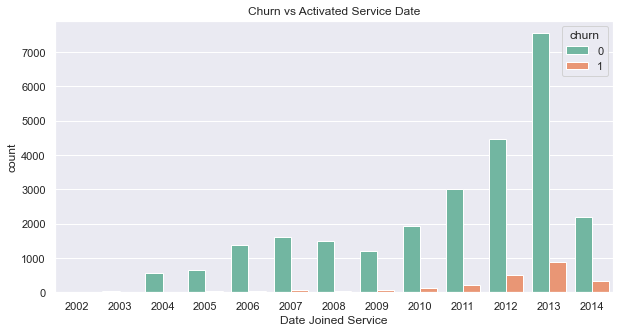

In [65]:
# set figure size
plt.figure(figsize=(10,5))

# create countplot
ax = sns.countplot(telecom_data.date_fst_atv.dt.year,hue='churn',data=telecom_data)

# set axis labels and title
ax.set(xlabel='Date Joined Service',title='Churn vs Activated Service Date');

**Observation:**

- We observe steady rise in churn for the period of 2009 to 2013

In [66]:
# dropping date_fst_atv as we already have days since customer active
telecom_data = telecom_data.drop(columns=['date_fst_atv'])

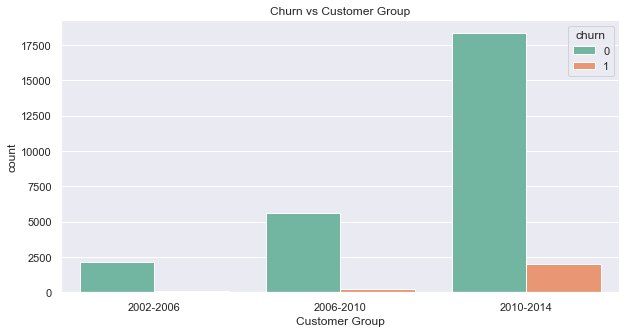

In [67]:
# set figure size
plt.figure(figsize=(10,5))

# create countplot
ax = sns.countplot(telecom_data.customer_group,hue='churn',data=telecom_data)

# set axis labels and title
ax.set(xlabel='Customer Group',title='Churn vs Customer Group',xticklabels=['2002-2006','2006-2010','2010-2014']);

**Observation:**

- We see that the recently joined customers between timeframe (2010 - 2014) are the ones that with higher churn rate

### NUMERICAL DATA VISUALISATION

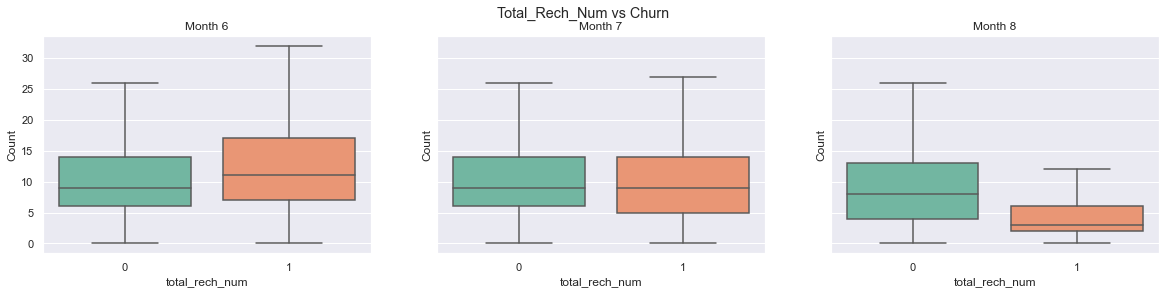

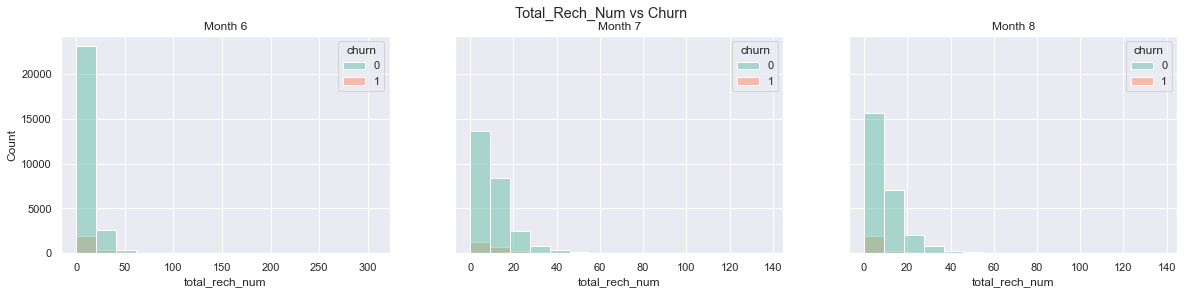

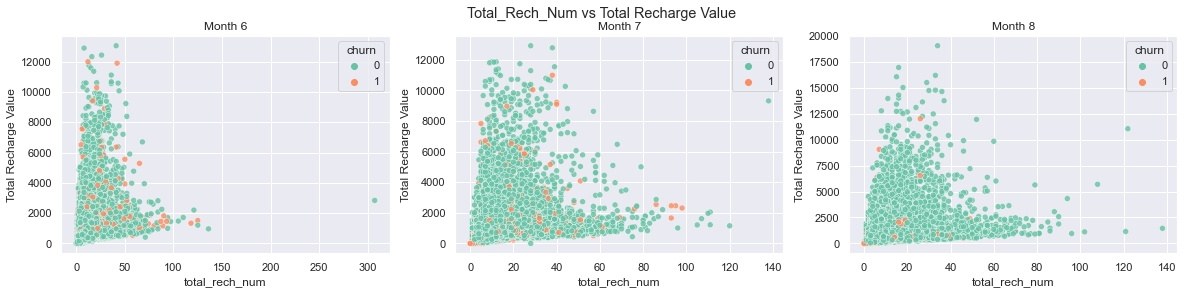

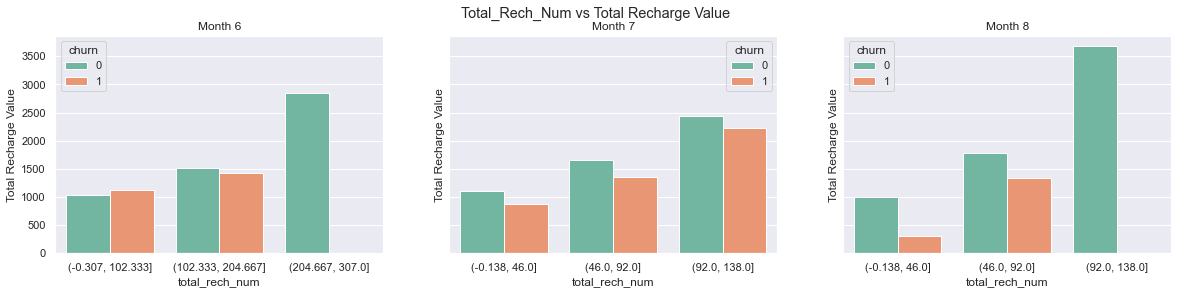

In [68]:
plot_graphs('total_rech_num')

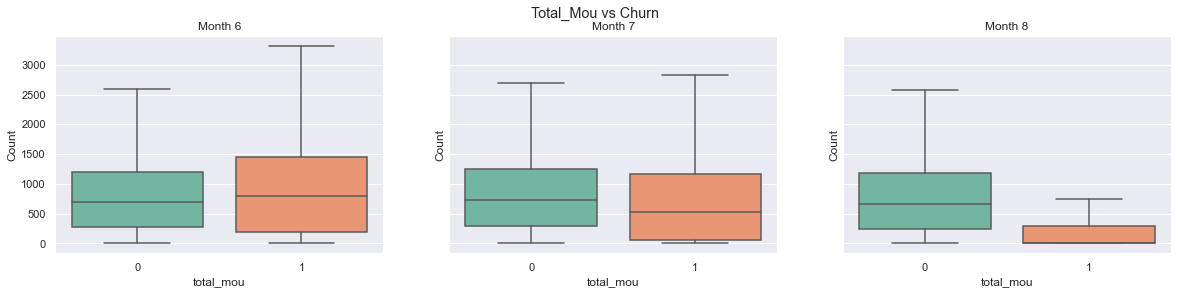

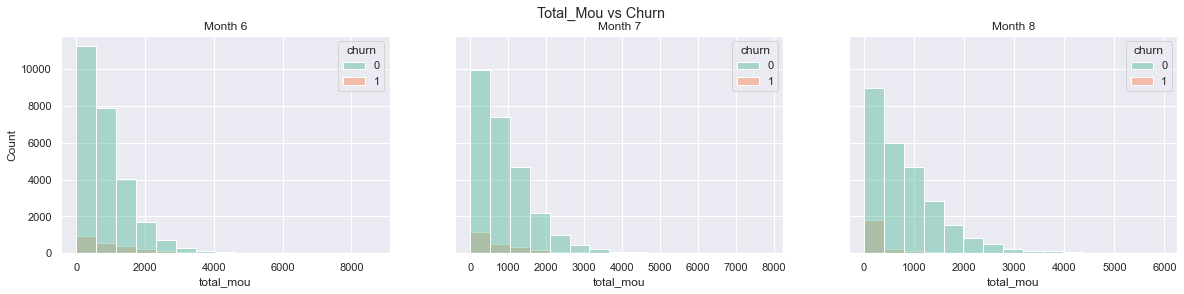

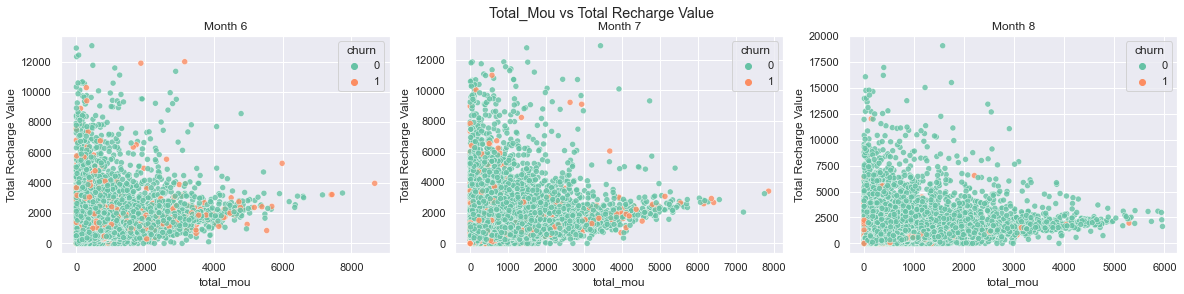

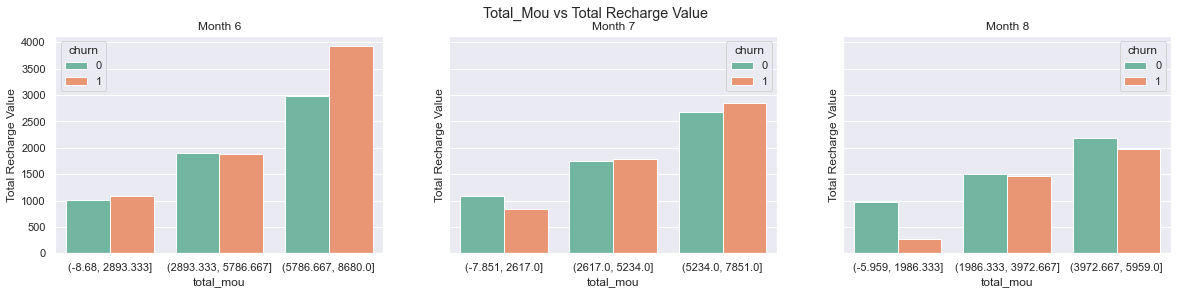

In [69]:
plot_graphs('total_mou')

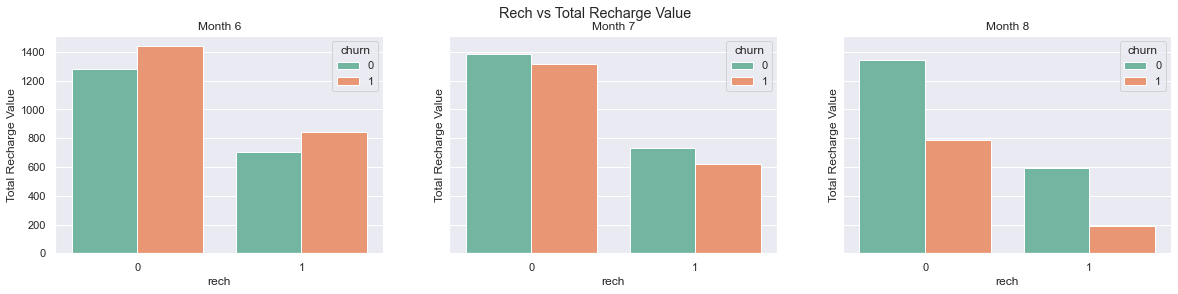

In [70]:
plot_bar('rech',segment=False)

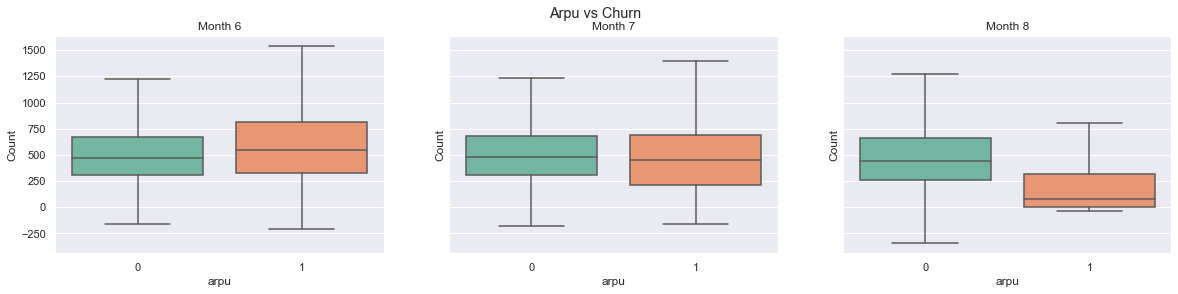

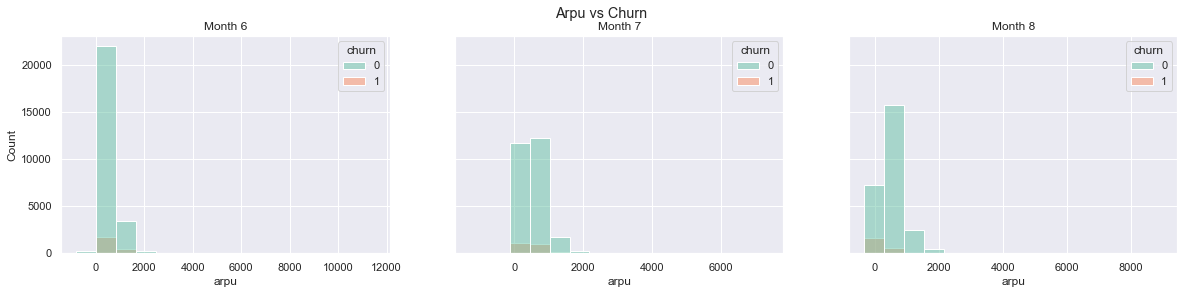

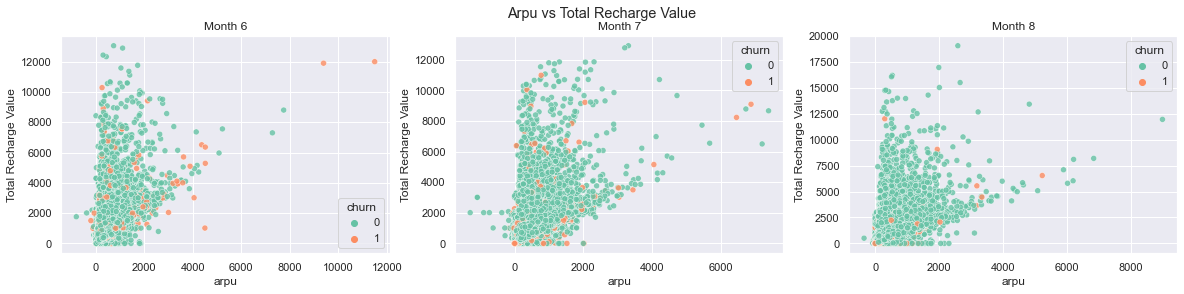

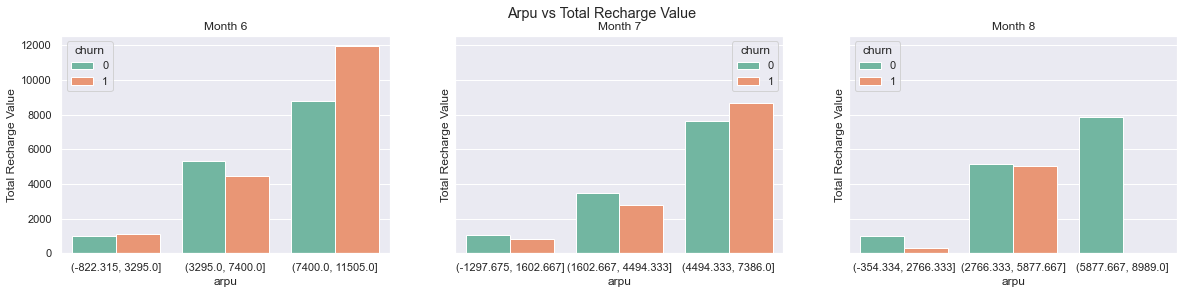

In [71]:
plot_graphs('arpu')

In [72]:
#lets group different numerical columns based on feature names
string_list=['arpu','others','count','days','last_day','total','max','vol','vbc','isd','loc_ic','spl','roam','std_ic','loc_og','std_og']

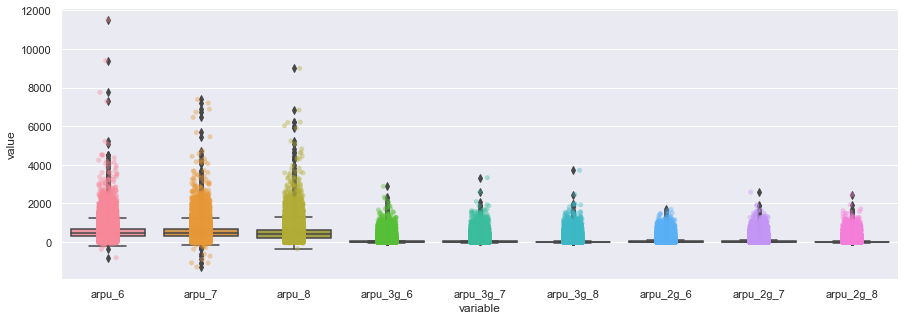

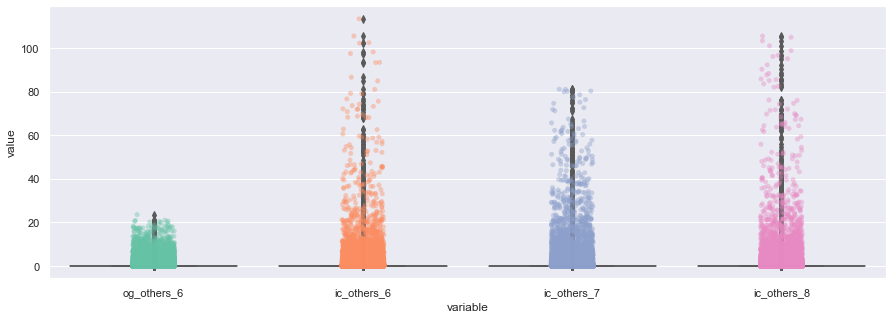

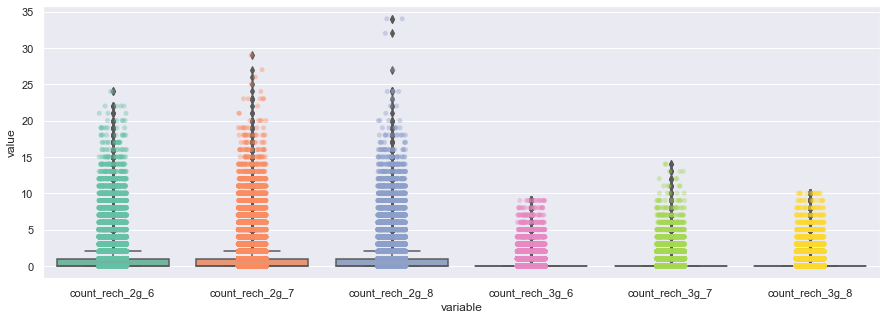

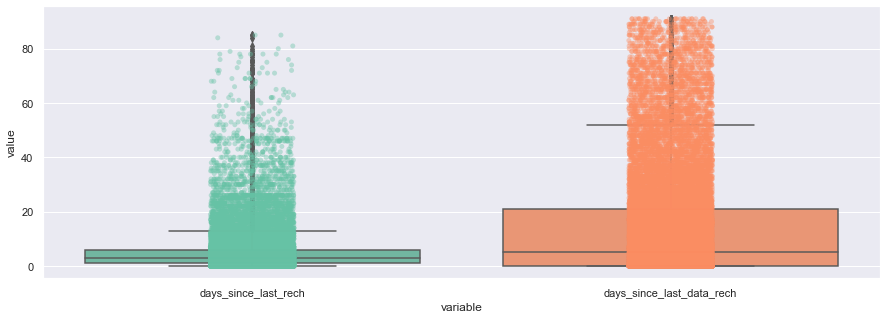

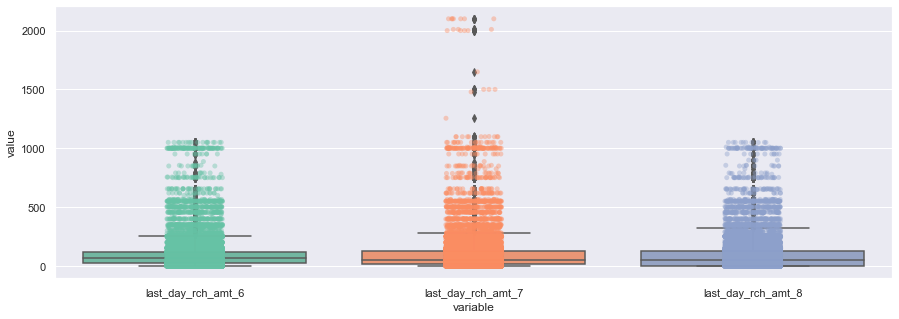

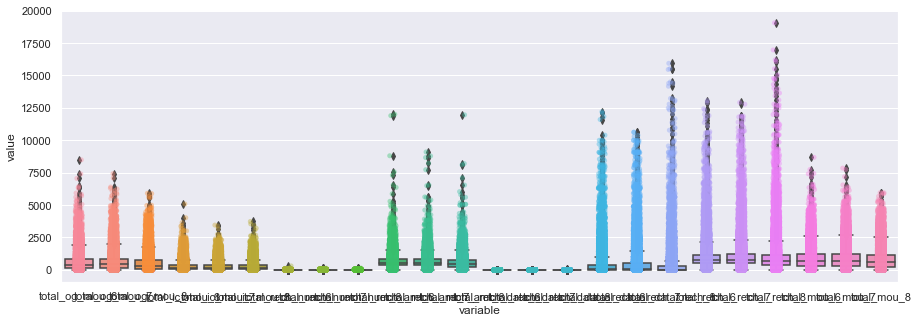

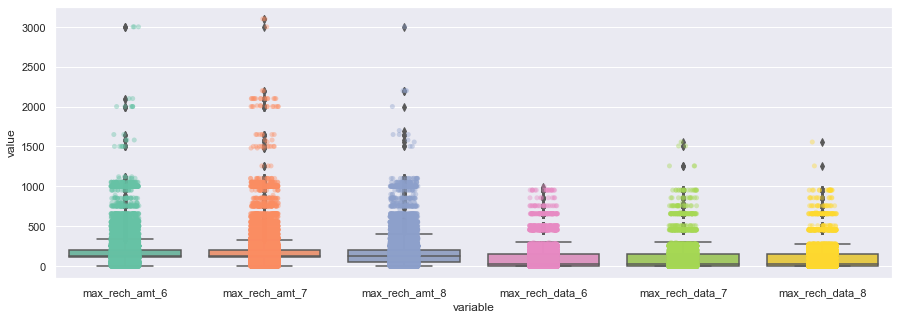

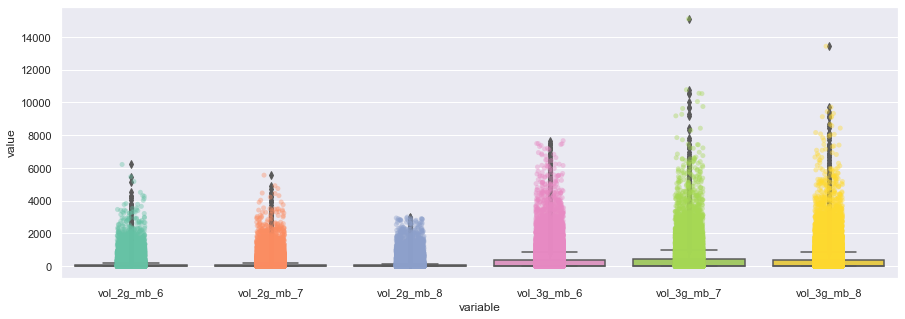

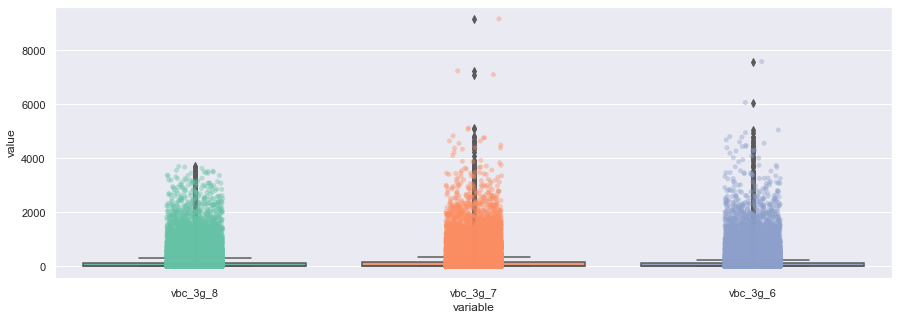

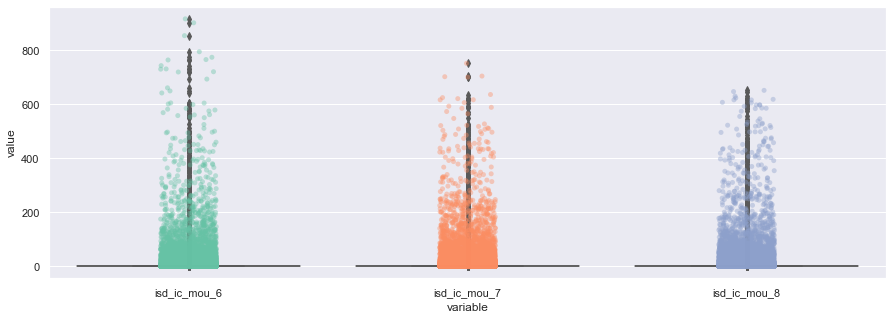

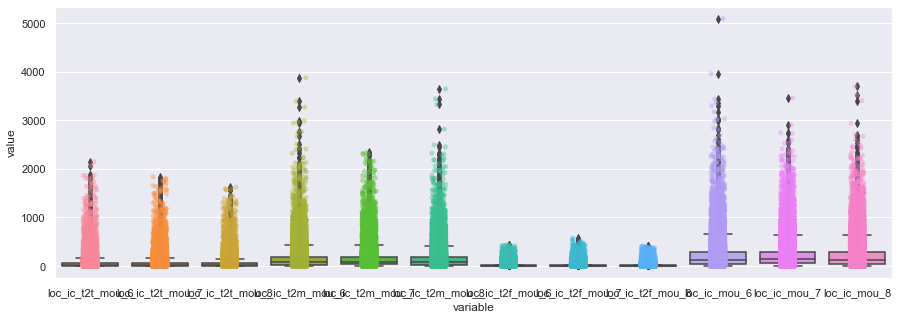

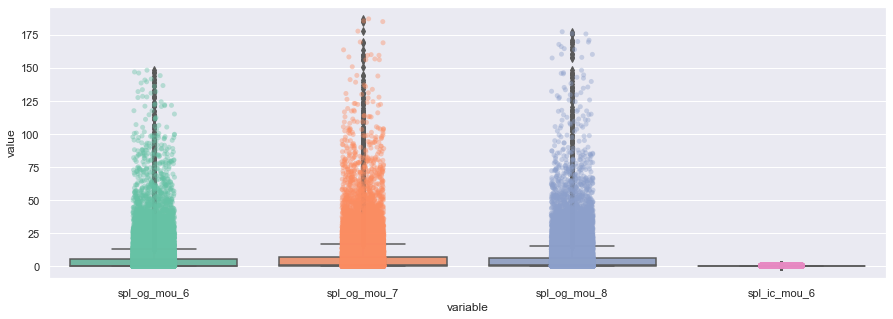

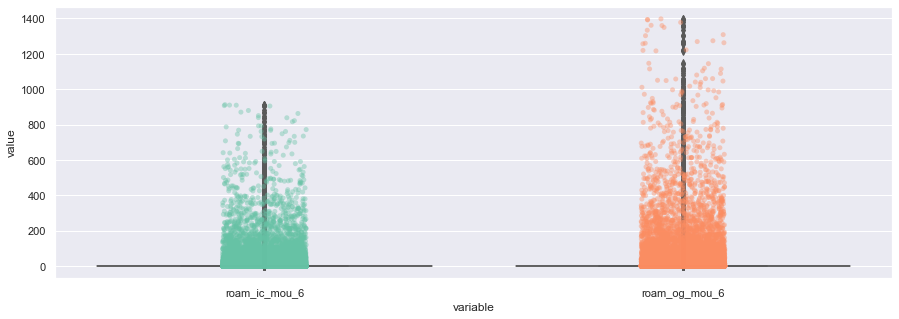

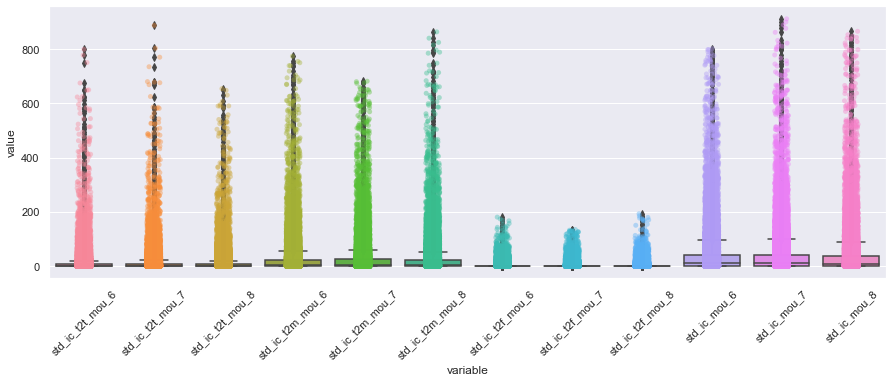

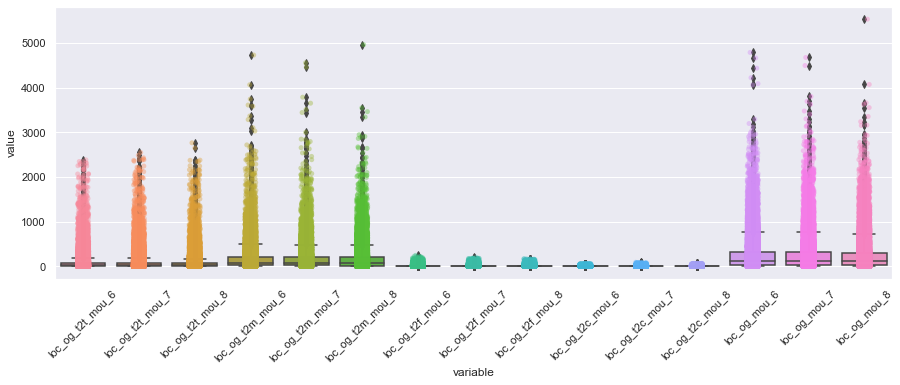

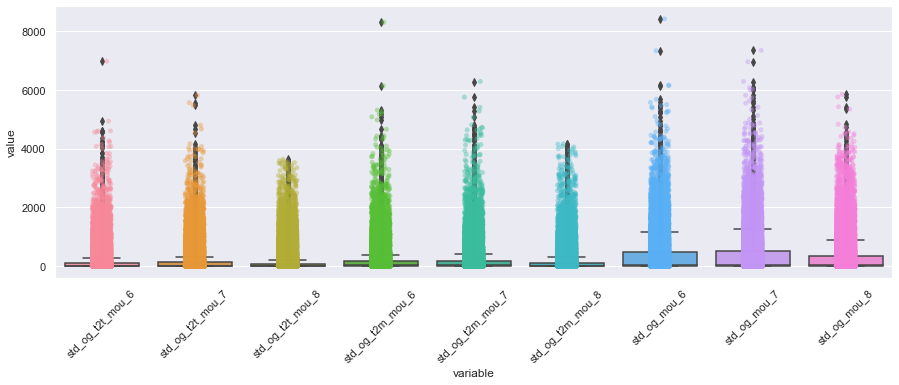

In [73]:
# iterate over above list and the commonly grouped columns are then ploted as one boxplot
for x in string_list:
    col_list=telecom_data.columns[telecom_data.columns.str.contains(x)]   #pull out the columns having common name (x)
    plt.figure(figsize=(15,5))
    sns.boxplot(x="variable", y="value", data=pd.melt(telecom_data[col_list])) #display boxplot 
    sns.stripplot(x="variable", y="value", data=pd.melt(telecom_data[col_list]),alpha=0.4)
    if(x in ['std_ic','loc_og','std_og']):
        plt.xticks(rotation=45)

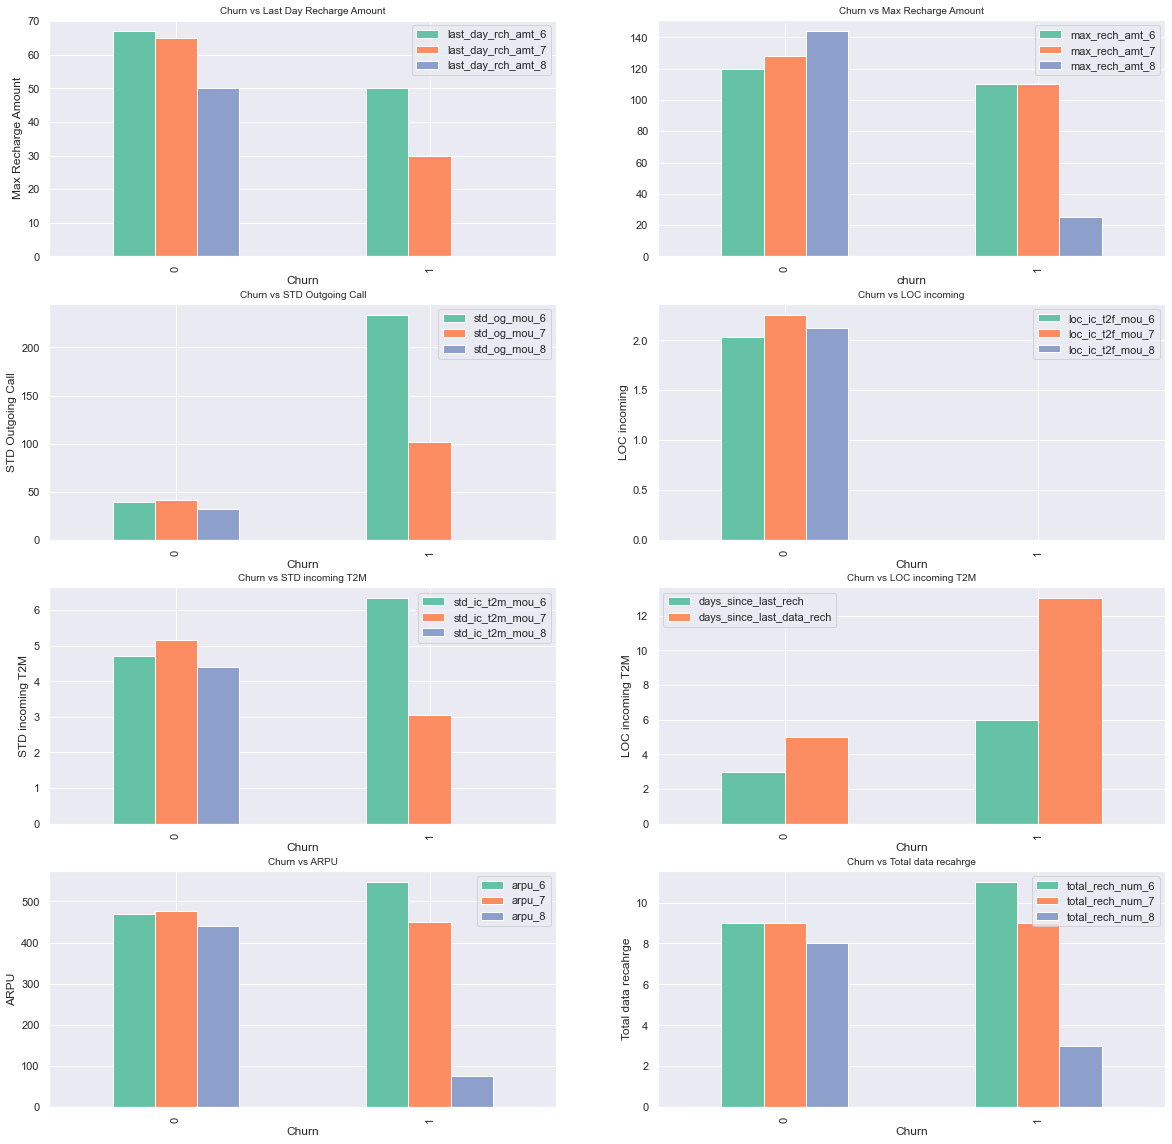

In [74]:
fig,[[ax1, ax2],[ax3, ax4],[ax5,ax6],[ax7,ax8]]=plt.subplots(4,2,figsize=(20,20))

#pull out last day recharge columns for month 6,7,8
temp_df = telecom_data.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
temp_df.plot.bar(ax=ax1)
#set title and x,y labels
ax1.set_title('Churn vs Last Day Recharge Amount', fontsize=10)
ax1.set_xlabel("Churn")
ax1.set_ylabel("Last Day Recharge Amount")

#pull out max recharge columns for month 6,7,8
temp_df = telecom_data.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].median()
temp_df.plot.bar(ax=ax2)
#set title and x,y labels
ax2.set_title('Churn vs Max Recharge Amount', fontsize=10)
ax1.set_xlabel("Churn")
ax1.set_ylabel("Max Recharge Amount")

#pull out std outgoing columns for month 6,7,8
temp_df = telecom_data.groupby(['churn'])['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'].median()
temp_df.plot.bar(ax=ax3)
#set title and x,y labels
ax3.set_title('Churn vs STD Outgoing Call', fontsize=10)
ax3.set_xlabel("Churn")
ax3.set_ylabel("STD Outgoing Call")

#pull out loc incoming t2f columns for month 6,7,8
temp_df = telecom_data.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].median()
temp_df.plot.bar(ax=ax4)
#set title and x,y labels
ax4.set_title('Churn vs LOC incoming', fontsize=10)
ax4.set_xlabel("Churn")
ax4.set_ylabel("LOC incoming")

#pull out loc incoming t2f columns for month 6,7,8
temp_df = telecom_data.groupby(['churn'])['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8'].median()
temp_df.plot.bar(ax=ax5)
#set title and x,y labels
ax5.set_title('Churn vs STD incoming T2M', fontsize=10)
ax5.set_xlabel("Churn")
ax5.set_ylabel("STD incoming T2M")

#pull out dasys since last recharge columns for month 6,7,8
temp_df = telecom_data.groupby(['churn'])['days_since_last_rech','days_since_last_data_rech'].median()
temp_df.plot.bar(ax=ax6)
#set title and x,y labels
ax6.set_title('Churn vs LOC incoming T2M', fontsize=10)
ax6.set_xlabel("Churn")
ax6.set_ylabel("LOC incoming T2M")

#pull out ARPU columns for month 6,7,8
temp_df = telecom_data.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
temp_df.plot.bar(ax=ax7)
#set title and x,y labels
ax7.set_title('Churn vs ARPU', fontsize=10)
ax7.set_xlabel("Churn")
ax7.set_ylabel("ARPU")


# #pull out Total data recahrge columns for month 6,7,8
# temp_df = telecom_data.groupby(['churn'])['total_data_rech_6', 'total_data_rech_7', 'total_data_rech_8'].median()
# temp_df.plot.bar(ax=ax8)
# #set title and x,y labels
# ax8.set_title('Churn vs Total data recahrge', fontsize=10)
# ax8.set_xlabel("Churn")
# ax8.set_ylabel("Total data recahrge")

 

#pull out ARPU columns for month 6,7,8
temp_df = telecom_data.groupby(['churn'])['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'].median()
temp_df.plot.bar(ax=ax8)
#set title and x,y labels
ax8.set_title('Churn vs Total data recahrge', fontsize=10)
ax8.set_xlabel("Churn")
ax8.set_ylabel("Total data recahrge")

# #pull out Total data recahrge columns for month 6,7,8
# temp_df = telecom_data.groupby(['churn'])['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'].median()
# temp_df.plot.bar(ax=ax10)
# #set title and x,y labels
# ax10.set_title('Churn vs Max data recahrge', fontsize=10)
# ax10.set_xlabel("Churn")
# ax10.set_ylabel("Max data recahrge")

# temp_df = telecom_data.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
# temp_df.plot.bar()
# plt.title('Churn vs ARPU', fontsize=20)
# plt.show()

 

plt.show()

**Observations:**
 
- Max recharge is considerable reduced for Churners
 

- Loc incoming T2F is never utilised by Churners
 

- last day recharge amount decreases for CHurners over period of 3 months
 

- Standard Outgoing MOU has a steep decrease from good phase to action phase which is good indicator of churners
 

- STD incoming T2M also also decrease for chruners from month 6 to 8
 

- If Days since Last data recharge is high then the possiblility of Churners will also be high
 

- ARPU decreases over month 6 to 8 indicating the Churners
 

- Total recharge number gradually decreases for CHurn customers

### Handling highly correlated Featues

lets check the correlation amongst the features, drop the highly correlated ones

In [75]:
# get correlation matrix
cor = telecom_data.corr()

# get the Lower triangle of an matrix. 
cor.loc[:,:] = np.tril(cor, k=-1)

# stack the correlation array
cor = cor.stack()

# Filter the list which has correlation above |80| percent 
corr_df = cor[(cor > 0.80) | (cor < -0.80)].sort_values(ascending=False).to_frame().reset_index().rename(columns={0:'corr'})

# get the low correlated feature with Target between the multicollinearity variables, So to 
# prevent lossing a high information feature from being dropped in multicollenarity
corr_value = []
for index , row in corr_df.iterrows():
    corr_value.append(row[1] if telecom_data[['churn',row[0]]].corr()[row[0]][0] > telecom_data[['churn',row[1]]].corr()[row[1]][0] else row[0])

# concatingate to see the low correlated feature in the Low_churn_corr column
corr_df = pd.concat([corr_df,pd.Series(corr_value,name='low_churn_corr')],axis=1)
corr_df.head()

level_0           level_1      corr  low_churn_corr
0       fb_user_7  night_pck_user_7  0.958988       fb_user_7
1       fb_user_6  night_pck_user_6  0.958862       fb_user_6
2       fb_user_8  night_pck_user_8  0.957699       fb_user_8
3  total_ic_mou_6      loc_ic_mou_6  0.955748    loc_ic_mou_6
4  total_ic_mou_8      loc_ic_mou_8  0.955167  total_ic_mou_8

We have now obtained the multicollinearlity features that can be dropped which has lower correlation with target variable

In [76]:
# dropping featuresfrom columns low_churn_corr
telecom_data.drop(columns=list(set(corr_df.low_churn_corr)),inplace=True)

In [77]:
telecom_data.shape

(28347, 91)

# SPLIT DATAFRAME AS X AND Y

In [78]:
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve,f1_score,auc
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [79]:
# get target vaiable
y = telecom_data.churn
# get dependent features
X = telecom_data.drop('churn',axis=1)

# print shape of x and y
print(X.shape)
print(y.shape)

(28347, 90)
(28347,)


#### SPLITTING DATA INTO TRAIN AND TEST DATA SET

In [80]:
# set random state value which can be used globally for models and data imputaion
randm_st=0

Lets split the data into train and test split.

We will stratify the target variable to make a equal class split balance between traina and test data

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=randm_st,stratify=y)

#### Rescaling of Features using StandardScaler

In [84]:
#initialising the scalar
scaler=StandardScaler()

#### Applying StandardScaler on TRAIN DATASET

In [85]:
num_cols=list(X_train.columns)

#apply fit and transform on train dataframe
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])

#### Applying StandardScaler to TEST DATASET

Let's apply Standard scaling on test dataset and **only transform the data**

In [86]:
#transform the test data with Scalar
X_test[num_cols]=scaler.transform(X_test[num_cols])

### HANDLING CLASS IMBALANCE USING ADASYN

Since the class is imbalance we will use a techinque to handle the imbalance data whihc will increate the sample size of the number of churned customer 

This can be done usinf serve method like over-sampling, SMOTE , ADASYN ... etc

We will use ADASYN as we assume that it works well with this data set

In [87]:
# initializing ADASYN
adasyn = ADASYN(random_state=randm_st,n_jobs=-1)

# Fit and resmapel the data to get balance classes
X_train, y_train = adasyn.fit_resample(X_train,y_train)

In [88]:
# now lets print the shape and see the size of our data set
print(X_train.shape)
print(y_train.shape)
print("\n Churn and Non-Churn data count \n",y_train.value_counts())

(36513, 90)
(36513,)

 Churn and Non-Churn data count 
 1    18289
0    18224
Name: churn, dtype: int64


We have now **balanced** the Churn data w.r.t no Non-churn

## Feature Selection / Dimension Reduction

We have number of ways to handle feature selection for feeding the model varaibles

We have selcted few imputation methods 

    - RFE 
        > Reduce the number of columns to give feature number thorughh recursive feature elimination
    - VIF / P-Value
        > Adding columns one by one to logistic model and Filtering features based on the P - Value and VIF of a feature
    - PCA
        > Fedding PCA with the data set and combine uncorrelated columns to provide a valuabe infromation by shrinking the columns

## RFE
#### Lets reduce the columns to 20

In [89]:
# define a logistic model
lr = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(lr, 20)

# fit the data
rfe = rfe.fit(X_train, y_train)

In [90]:
# now we have the features that has been selected by RFE
rfe_selected_columns = X.columns[rfe.support_]

# view the selcted features
print("Features identified by RFE ", rfe_selected_columns)

Features identified by RFE  Index(['arpu_7', 'loc_og_t2m_mou_7', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'std_og_mou_6', 'std_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2m_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'arpu_3g_8',
       'vbc_3g_8', 'total_data_rech_8', 'days_since_last_rech', 'rech_8',
       'customer_group'],
      dtype='object')


### Define Test and Training data with RFE features selection

In [91]:
X_train_rfe = X_train[rfe_selected_columns.values.tolist()]
X_test_rfe = X_test[rfe_selected_columns.values.tolist()]
X_train_rfe.shape

(36513, 20)

## VIF / P-Value

In [92]:
# Creating a method to get the top correlated features
def get_top_corr_features():
    # add target column to find correlation
    correlation_df = pd.concat([X_train,y_train],axis=1)
    # creating a correlation list for the top features with SalesPrice
    corr_cols = correlation_df.corr().loc[:,'churn'].sort_values(ascending=False)
    corr_cols = corr_cols.reset_index()
    # order the data with positive corr first and negative corr last
    corr_cols = corr_cols[corr_cols.churn>0].append(corr_cols[corr_cols.churn<0])
    return corr_cols

In [93]:
# sort the correlated features with top 15 and last 15 
corr_cols = get_top_corr_features().head(15).append(get_top_corr_features().tail(15)\
                                    .sort_values('churn',ascending=True))[1:].reset_index(drop=True)\
                                    .rename(columns={'index':'features','churn':'correlation'})

In [94]:
corr_cols.head()

features  correlation
0                     rech_8     0.365010
1       days_since_last_rech     0.309129
2             customer_group     0.214816
3  days_since_last_data_rech     0.186078
4               std_og_mou_6     0.164673

In [95]:
# defina method to caluclate VIF
def VIF(X_train_rfe):
    # create a dummy dataframe
    vif = pd.DataFrame(columns=['Features','VIF'])
    
    # extract the column values to vif features column value
    vif['Features'] = X_train_rfe.columns

    # calculate vif for the train data for the added features
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    
    # round the value to 2 decimals
    vif['VIF'] = round(vif['VIF'], 2)
    
    # sort values by hightevif value first
    vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
    
    # print vif table
    #display(vif)
    
    # retrun vif object
    return vif

Building Model based on Logit (Logistic) model from statsmodels library

In [96]:
# this function can be resued to build ols model for given features
def build_model(X_train):
    # adding a constant variable for intercept
    X_train_vif = sm.add_constant(X_train)

    # Initialize an OLS model for our dataset and fit the data to model
    lm = sm.Logit(y_train,X_train).fit()

    # view the summary of the model for selected features
    #print(lm.summary())

    return lm

We have two way to build a model to find the best features selected by RFE that would fit.
<ul><li>Dropping a feature one by one from the model built with 50 features until it shows good performane without overfitting</li><li>Adding a feature one by one to the model until it shows a good performance metrics</li></ul>

Lets add features one by one and build our model

Lets create a custom logic based on the below condition

<table>
<tr><th style="text-align:center">Order</th><th style="text-align:center">P-value</th><th style="text-align:center">VIF</th><th style="text-align:center">Action</th></tr>
<tr><td>1</td><td>High</td><td>High</td><td>Drop these columns First</td></tr>
<tr><td>2</td><td>High</td><td>Low</td><td>Drop these columns one by one, because this could lower the VIF values of other columns to prevent it from being dropped in next step </td></tr>
<tr><td>3</td><td>Low</td><td>High</td><td>Drop the colums with VIF greater than 5</td></tr>
<tr><td>4</td><td>Low</td><td>Low</td><td>Keep these features</td></tr>
</table>	

In [97]:
# deifne a method to make a incremental feature selection 
# by adding feature one by one and evaluating the logistic model
# to check p value and vif value 
def perform_feature_selection(train_data):
    # create a empty data frame for xtrain and vif
    X_train_vif = pd.DataFrame()
    vif = pd.DataFrame()

    # creating this object to ignore vif for a single feature
    count = 1

    # created this varible to stop the outer loop of adding futher features for model
    stop = False

    # prev r2score
    r2score = 0.0
        
    for col in corr_cols.features:
        print("adding :"+col)
        # add the column to the traing data set
        if col in train_data.columns.values:
            X_train_vif[col] = train_data[col]

            # rebuild the model again to ckeck for high vifs and p-values 
            # once a feature is dropped on the above conditions after adding 
            # the new feature from the previous step to the model
            while True:
                # build the model
                lm = build_model(X_train_vif)

                # Drop the previous column if r2score doesn't increase
                if round(r2score,3) == round(lm.prsquared,3):

                    print("\n\n Dropping "+X_train_vif.columns.values[-1]+" and rebuilding the model as it did not add any info to model \n\n")
                    count = count - 1
                    X_train_vif.drop(X_train_vif.columns.values[-1],axis=1, inplace=True)
                    
                    # build the model again as we have removed a feature 
                    lm = build_model(X_train_vif)

                # Assign new r2score to check for the next build on adding new feature
                r2score = lm.prsquared

                # ignore vif and p-value check since there will
                # be only 1 column on first iteration
                if count != 1:

                    # calculate VIF
                    vif = VIF(X_train_vif)

                    # if the model reaches required r2 score stop the model from executing furher steps
                    if lm.prsquared >= 0.35:
                        stop = True
                        break

                    # Check if the p-value if high
                    if (lm.pvalues > 0.05).sum() > 0:

                        # extract feature fo high p-value
                        feature = lm.pvalues[lm.pvalues > 0.05].index

                        # check if this feature is not const
                        if feature[0] != 'const':

                            # if the VIF value is aslo high drop this columns first
                            if feature[0] in vif.loc[vif.VIF > 5,'Features']:
                                X_train_vif.drop(feature[0],axis=1,inplace=True)                # order 1
                            else:
                                # if only the p-value is high drop it
                                X_train_vif.drop(feature[0],axis=1,inplace=True)                # order 2

                        # if the p-value column is 2nd in the list extract 
                        # that feature name to drop if from dataset if there is 
                        # a third value with high p-value it will be
                        # validated in the next loop after rebuild on dropping the current feature
                        elif (feature[0] == 'const') & (len(feature) > 1):
                            X_train_vif.drop(feature[1],axis=1,inplace=True)                    # order 2

                    # if VIF value is high drop it
                    if ((vif.VIF > 5).sum() > 0) & (col in X_train_vif.columns.values):
                        X_train_vif.drop(col,axis=1,inplace=True)   # order 3
                    else:
                        break                                                                   # order 4
                else:
                    break
            # stop the process
            if stop:
                break

            # increment count on adding new feature
            count = count + 1
            
    return X_train_vif

### Define the Train and Test data based on VIF / P-Value feature selection

In [98]:
X_train_vif = perform_feature_selection(X_train);
X_test_vif = X_test[X_train_vif.columns.tolist()];

adding :rech_8
Optimization terminated successfully.
         Current function value: 0.630549
         Iterations 4
adding :days_since_last_rech
Optimization terminated successfully.
         Current function value: 0.593300
         Iterations 6
adding :customer_group
Optimization terminated successfully.
         Current function value: 0.575206
         Iterations 6
adding :days_since_last_data_rech
Optimization terminated successfully.
         Current function value: 0.573986
         Iterations 6
adding :std_og_mou_6
Optimization terminated successfully.
         Current function value: 0.569094
         Iterations 6
adding :rech_7
Optimization terminated successfully.
         Current function value: 0.569066
         Iterations 6


 Dropping rech_7 and rebuilding the model as it did not add any info to model 


Optimization terminated successfully.
         Current function value: 0.569094
         Iterations 6
adding :std_og_t2t_mou_6
Optimization terminated successfully.
   

### PCA
#### Lets proceed with Dimensionality reduction using PCA

In [99]:
#lets initialise PCA
pca=PCA(svd_solver='randomized',random_state=randm_st)

# fit the data to PCA
pca.fit(X_train,y_train)

PCA(random_state=0, svd_solver='randomized')

Lets do ahead with scree plot to decide the right number of features needed

Text(0, 0.5, 'Total Variance Explained')

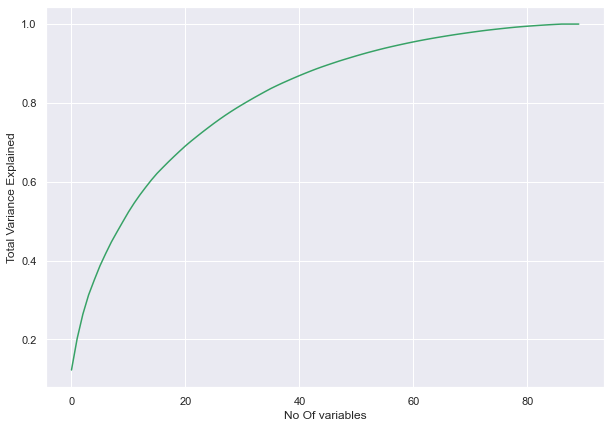

In [100]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_),c=dark_green)
plt.xlabel('No Of variables')
plt.ylabel('Total Variance Explained')

Using Scree plot we can see that it needs 50 Components to explain 90% of variance.

In [101]:
#initialising PCA with 50 components
pca_inc=IncrementalPCA(n_components=50)

#fit and transform the X_train DF
X_train_pca=pca_inc.fit_transform(X_train)

#Transform the Test DF
X_test_pca=pca_inc.transform(X_test)

# MODEL BUILDING

#### LETS DEFINE SOME GENERIC METHODS

In [102]:
def fit_predict(classifier_model,params,mode=None):
    #fit the pca train data
    train_data = X_train if mode==None else eval("X_train_"+mode)
    test_data = X_test if mode==None else eval("X_test_"+mode)
    
    # initialzie a StratifiedKFold 
    skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = randm_st)
    
    model = GridSearchCV(estimator=classifier_model, param_grid=params, cv=skf, n_jobs=-1)
    
    model.fit(train_data,y_train)

    #lets now predict on Test and Train data set
    y_train_pred=model.predict(train_data)
    y_test_pred=model.predict(test_data)
    y_pred_proba=model.predict_proba(test_data)
    
    return y_train_pred,y_test_pred,y_pred_proba,model

In [103]:
#Method to print Accuracy,Precision,recall and ROC score
model_eval = {}
def calculate_metrics():

    # initialize a dict
    metric = {}

    # calcuate Accuracy Score for Training data
    metric['Train Accuracy'] = round(accuracy_score(y_train,y_train_pred)*100,2)
    metric['Test Accuracy'] = round(accuracy_score(y_test,y_test_pred)*100,2)


    # calculate Recall for Test data
    metric['Train Recall'] = round(recall_score(y_train,y_train_pred)*100,2)
    metric['Test Recall'] = round(recall_score(y_test,y_test_pred)*100,2)


    # calcuate Precision for Test Data
    metric['Train Precision'] = round(precision_score(y_train,y_train_pred)*100,2)
    metric['Test Precision'] = round(precision_score(y_test,y_test_pred)*100,2)


    # calcuate AUC for Test Data
    metric['Train AUC'] = round(roc_auc_score(y_train,y_train_pred)*100,2)
    metric['Test AUC'] = round(roc_auc_score(y_test,y_test_pred)*100,2)


    # calcuate F1-Score for Test Data
    metric['Train F1-Score'] = round(f1_score(y_train,y_train_pred)*100,2)
    metric['Test F1-Score'] = round(f1_score(y_test,y_test_pred)*100,2)

    return metric
    

In [104]:
#Method to plot the Confusion matrix
def confusion_matrix_plot(X_test_arg,classifier_arg):
    
    plt.style.use('default')
    # create subplots
    fig,(axes1,axes2)=plt.subplots(1,2,figsize=(10,5))
    
    # plot a confusion matrix for test data
    plot_confusion_matrix(classifier_arg,X_test_arg,y_test,normalize='true',cmap=plt.cm.Blues,ax=axes1)
    
    # set title for the plot
    axes1.set_title('Confusion Matrix')
    axes2.set(xlabel='',ylabel='',xticklabels=[],yticklabels=[],xticks=[],yticks=[],title='Metrics')
    axes2.text(0.1,0.1,'Accuracy Score for Train set: '+str(metric['Train Accuracy'])+'\n\nAccuracy Score for Test set: '+str(metric['Test Accuracy'])+'\n\nRecall Score for Train set: '+str(metric['Train Recall'])+'\n\nRecall Score for Test set: '+str(metric['Test Recall'])+'\n\nPrecision Score for Train set: '+str(metric['Train Precision'])+'\n\nPrecision Score for Test set: '+str(metric['Test Precision'])+'\n\nAUC Score for Train set: '+str(metric['Train AUC'])+'\n\nAUC Score for Test set: '+str(metric['Test AUC'])+'\n\nF1-Score for Train set: '+str(metric['Train F1-Score'])+'\n\nF1-Score for Test set: '+str(metric['Test F1-Score']))
    # show plot
    plt.show()
    

In [105]:
def roc_curve_prec_curve(name):
    
    sns.set_style('darkgrid')
    # create subplots
    fig,(axes1,axes2) = plt.subplots(1,2,figsize=(10,5))
    
    # get the probability value
    y_pred_prb =y_pred_proba[:,1]
    
    # plot roc curve for y_test and predicted probaility
    fpr,tpr,thres=roc_curve(y_test,y_pred_prb)
    axes1.plot([0,1],[0,1],'k--')
    
    # plt False Positive Rate and True Positive Rate
    axes1.plot(fpr,tpr)
    
    # set labels and title for the subplot
    axes1.set_xlabel('False positive Rate')
    axes1.set_ylabel('True Positive rate')
    axes1.set_title('ROC Curve')
    
    # plot precision recall curve
    prec,recal,thres=precision_recall_curve(y_test,y_pred_prb)
    
    # plt False Positive Rate and True Positive Rate
    axes2.plot(fpr,tpr)
    
    # set axis labels and title
    axes2.set_xlabel('Recall')
    axes2.set_ylabel('Precision')
    axes2.set_title('Precision-Recall Curve')
    
    plt.show()
    
    # add the AUC Recall value as the final metric to model
    auc_scr=round(auc(recal,prec)*100,2)
    metric['AUC recall'] = auc_scr
    model_eval[name] = metric

### METRICS

`Accuracy score:` Gives the overall accuracy of the model for test/train data set

`ROC Curve:` Compares true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions 

`AUC (for ROC):` Measures the overall separability between classes of the model related to the ROC curve

`Precision-Recall-Curve:` Compares false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances Precision and recall as does not dependent on the number of true negatives and thereby excludes the imbalance

`F1 Score:` Builds the harmonic mean of precision and recall and thereby measures the compromise between both.

`AUC (for PRC):` Measures the overall separability between classes of the model related to the Precision-Recall curve

## LOGISTIC REGRESSION

In [106]:
# initialize hybper parameters
hyperparameters = {"penalty":["l1","l2"]}

#create an instance of linear regression
log_reg=LogisticRegression(class_weight='balanced', random_state=randm_st,n_jobs=-1)

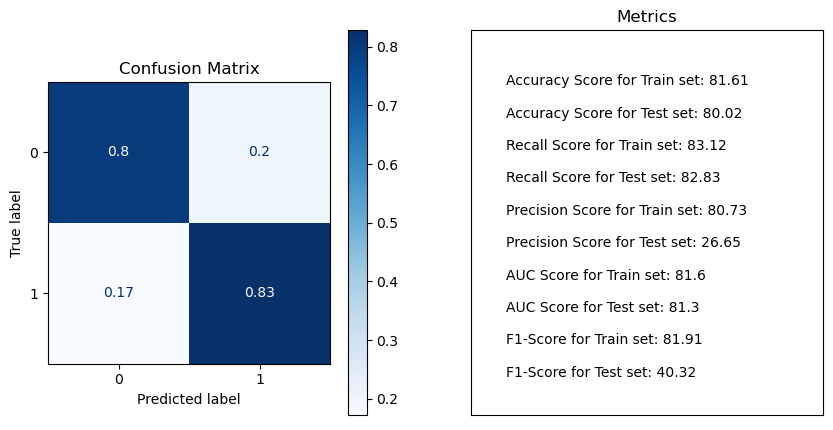

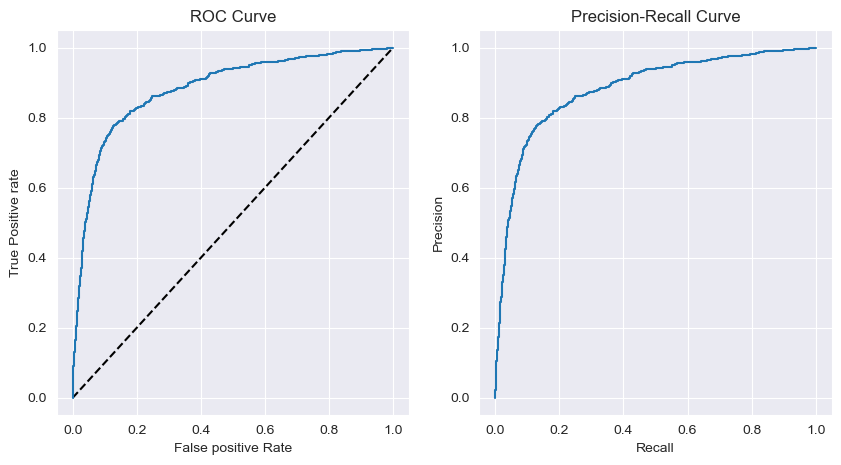

In [107]:
# fit and predict Logistic model to dataset obtained through RFE
y_train_pred,y_test_pred,y_pred_proba,log_model= fit_predict(log_reg,hyperparameters,'rfe')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_rfe,log_model)

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression RFE")

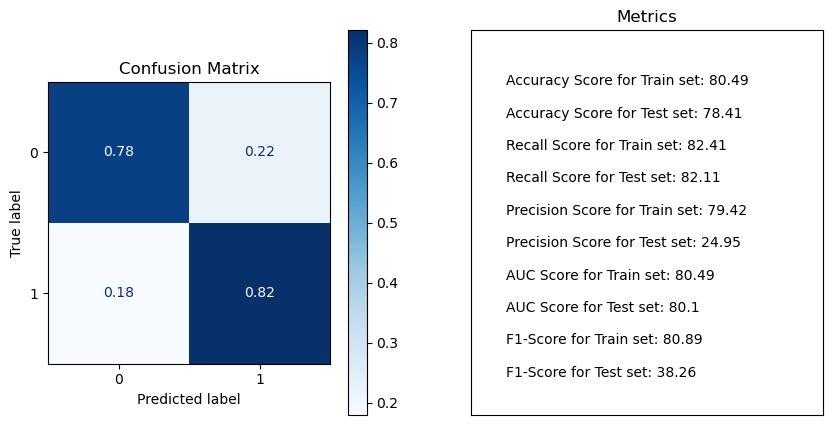

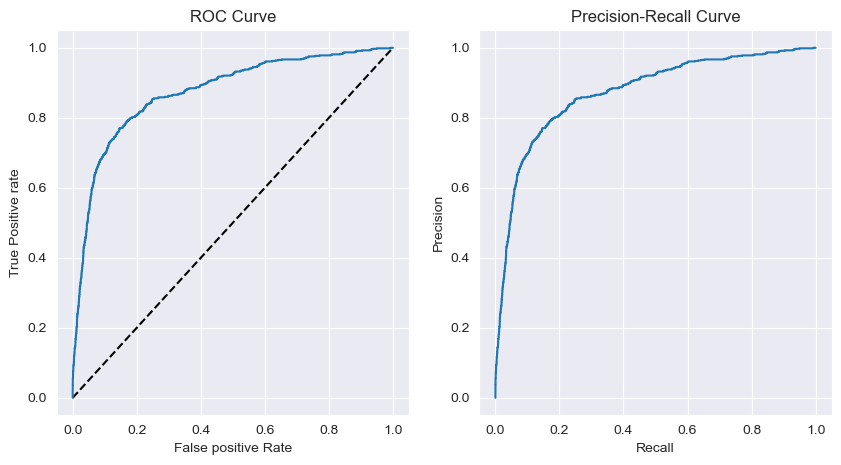

In [108]:
# fit and predict Logistic model to dataset obtained through VIF
y_train_pred,y_test_pred,y_pred_proba,log_model= fit_predict(log_reg,hyperparameters,'vif')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_vif,log_model)

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression VIF")

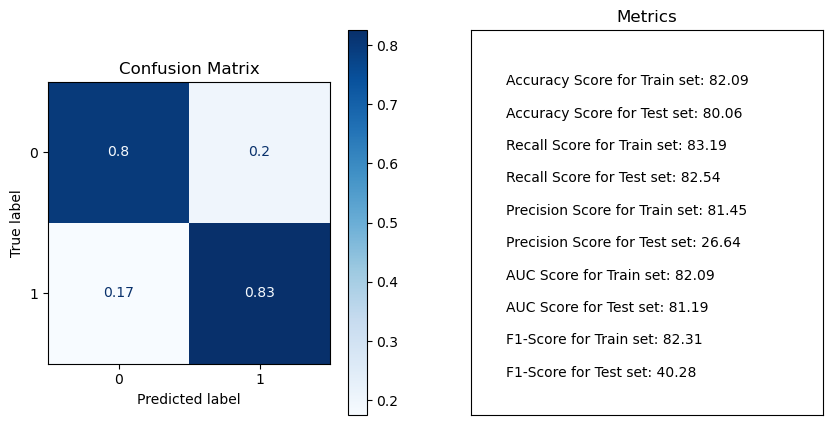

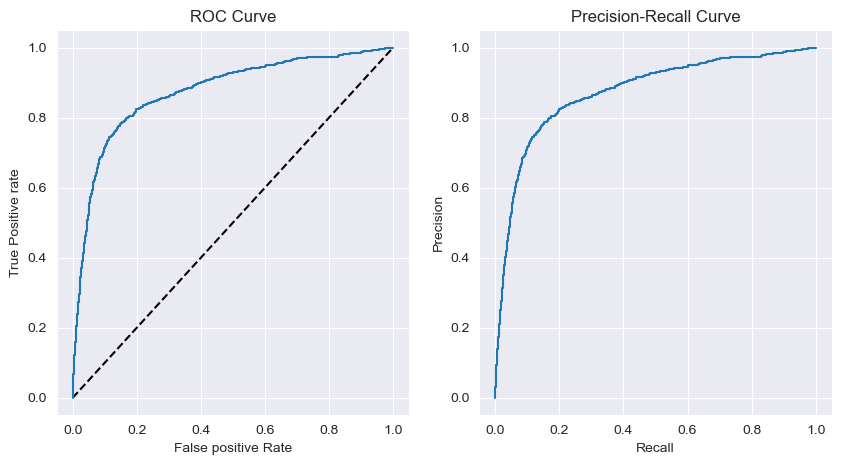

In [109]:
# fit and predict Logistic model to dataset obtained through PCA
y_train_pred,y_test_pred,y_pred_proba,log_model= fit_predict(log_reg,hyperparameters,'pca')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_pca,log_model)

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression PCA")

## K NEAREST NEIGHBORS

In [110]:
#List Hyperparameters that we want to tune.
leaf_size = [25,30,35]
n_neighbors = [5,10,15]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)

#create an instance of knn
knn=KNeighborsClassifier(n_jobs=-1)

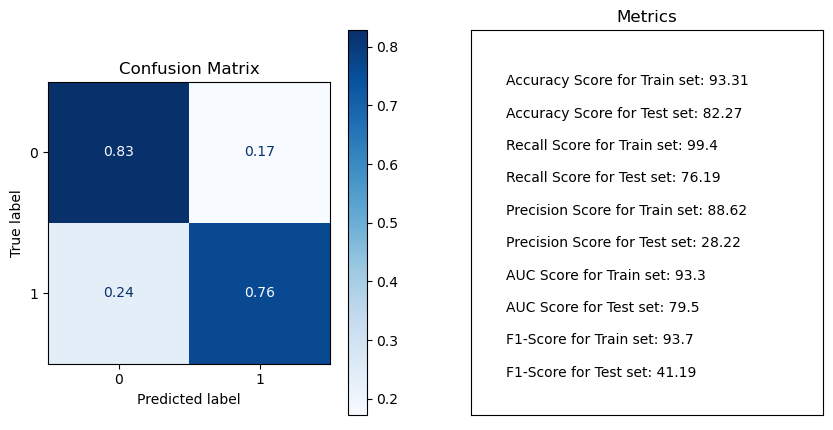

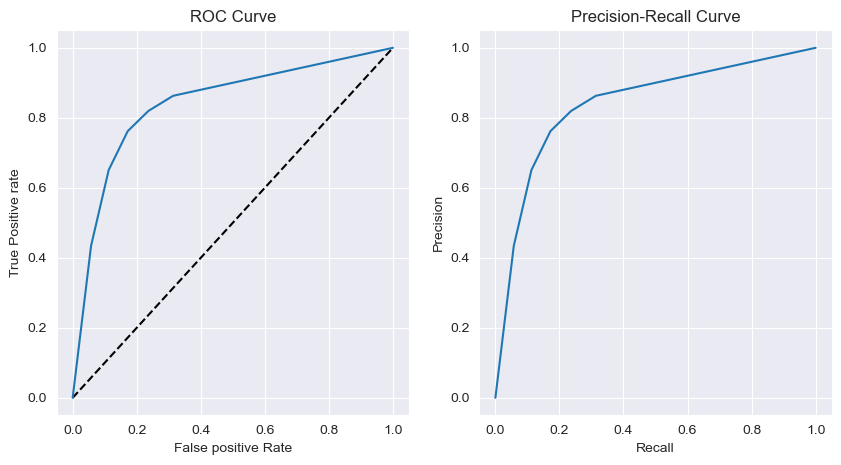

In [111]:
# fit and predict KNN model to dataset obtained through RFE
y_train_pred,y_test_pred,y_pred_proba,knn_model= fit_predict(knn,hyperparameters,'rfe')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_rfe,knn_model)

# plot a ROC cure and Precision-recall curve for the KNN Model
roc_curve_prec_curve("K Nearest Neighbours RFE")

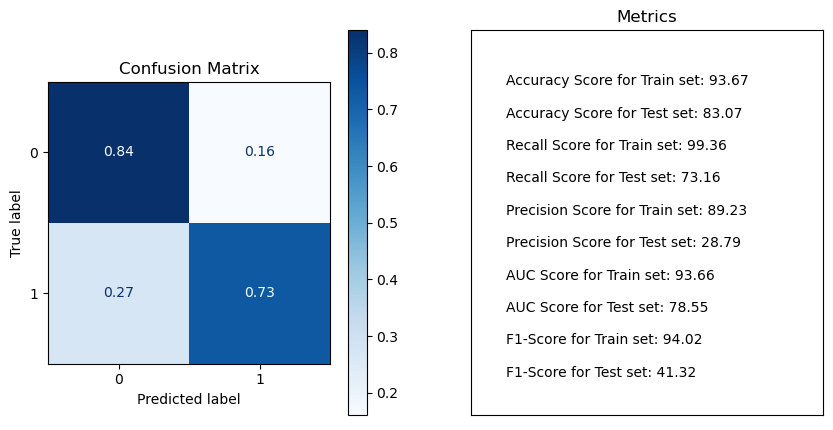

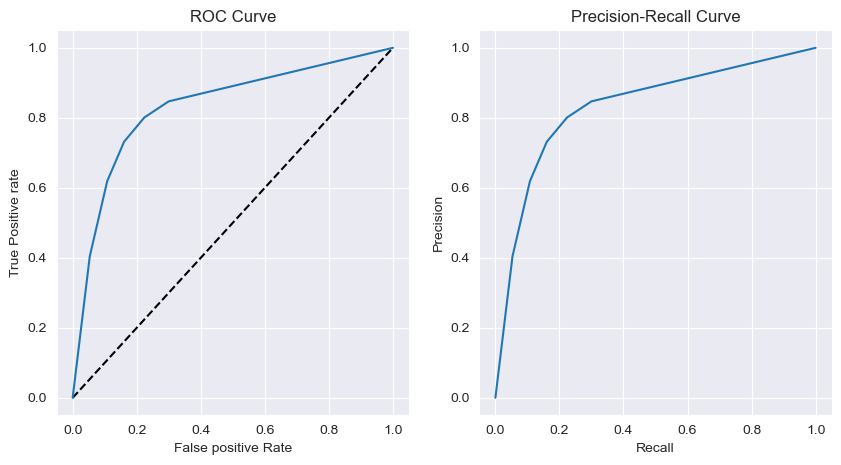

In [112]:
# fit and predict KNN model to dataset obtained through VIF
y_train_pred,y_test_pred,y_pred_proba,knn_model= fit_predict(knn,hyperparameters,'vif')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_vif,knn_model)

# plot a ROC cure and Precision-recall curve for the KNN Model
roc_curve_prec_curve("K Nearest Neighbours VIF")

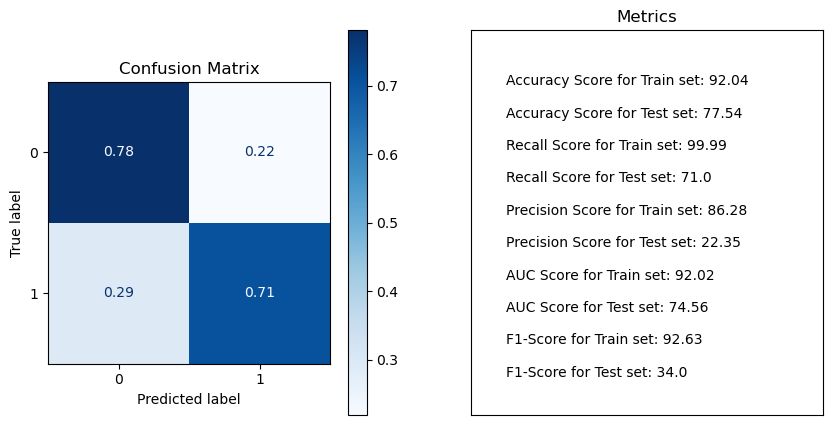

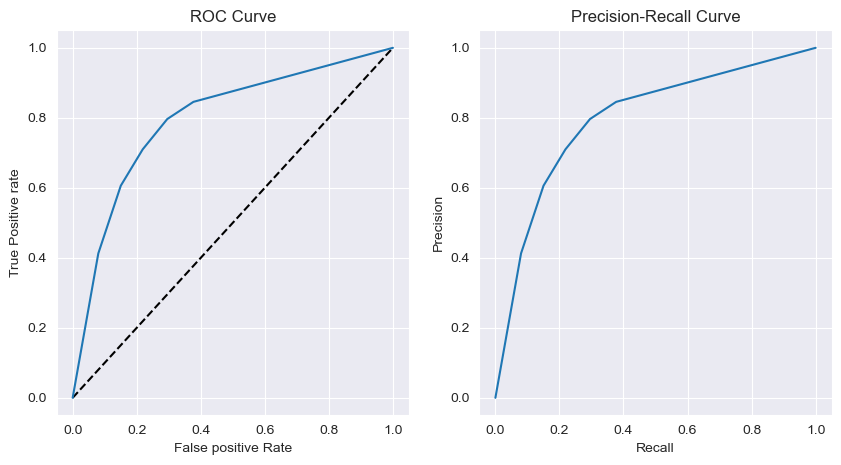

In [113]:
# fit and predict KNN model to dataset obtained through PCA
y_train_pred,y_test_pred,y_pred_proba,knn_model= fit_predict(knn,hyperparameters,'pca')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_pca,knn_model)

# plot a ROC cure and Precision-recall curve for the KNN Model
roc_curve_prec_curve("K Nearest Neighbours PCA")

## DECISION TREE

In [114]:
#List Hyperparameters that we want to tune.
min_samples_split = [10,15,20]
min_samples_leaf = [5,10,15]

#Convert to dictionary
hyperparameters = dict(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

#create an instance of decisiontree
dec_tree=DecisionTreeClassifier(random_state=randm_st)

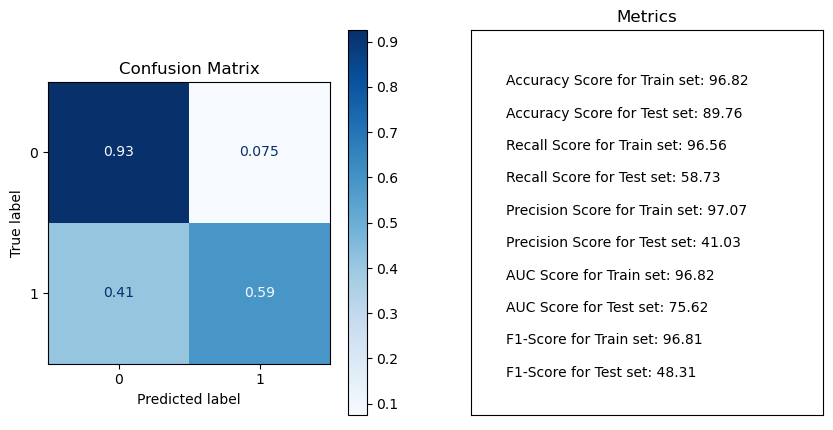

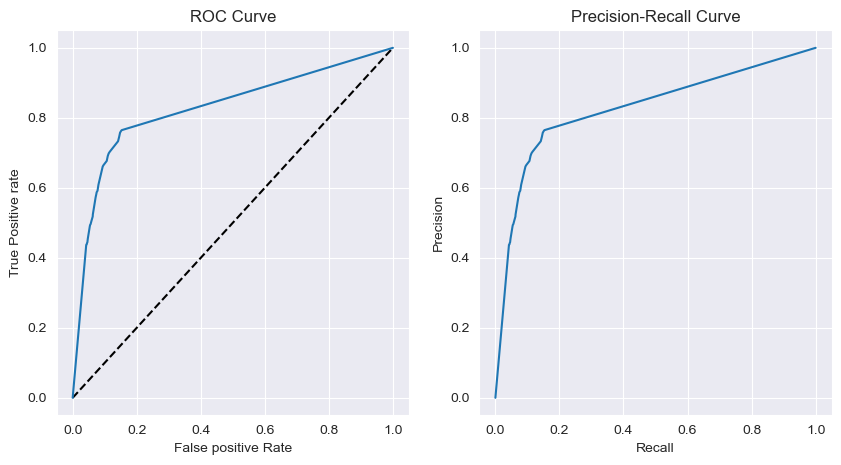

In [115]:
# fit and predict Decision Tree model to dataset obtained through RFE
y_train_pred,y_test_pred,y_pred_proba,dec_tree_model= fit_predict(dec_tree,hyperparameters,'rfe')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_rfe,dec_tree_model)

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree RFE")

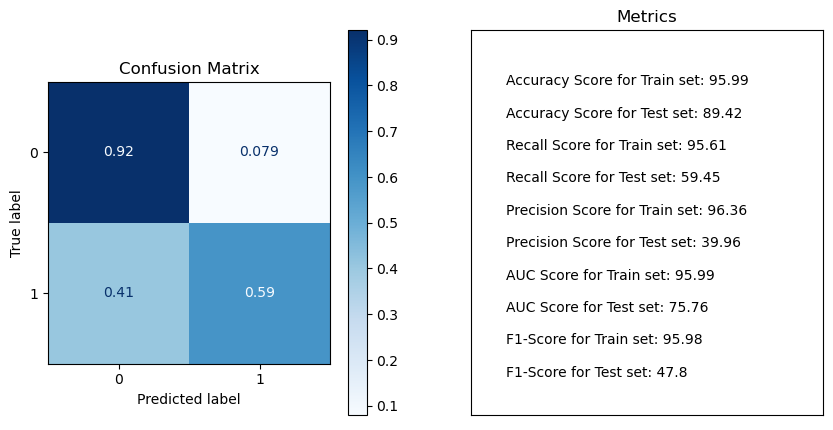

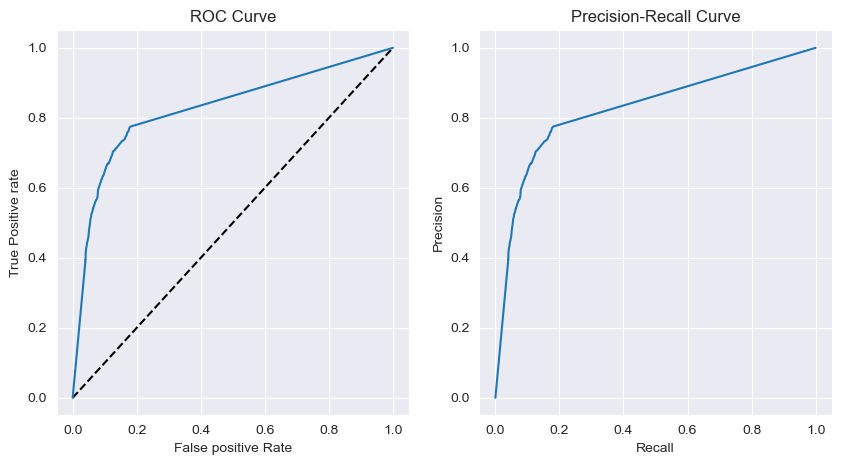

In [116]:
# fit and predict Decision Tree model to dataset obtained through VIF
y_train_pred,y_test_pred,y_pred_proba,dec_tree_model= fit_predict(dec_tree,hyperparameters,'vif')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_vif,dec_tree_model)

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree VIF")

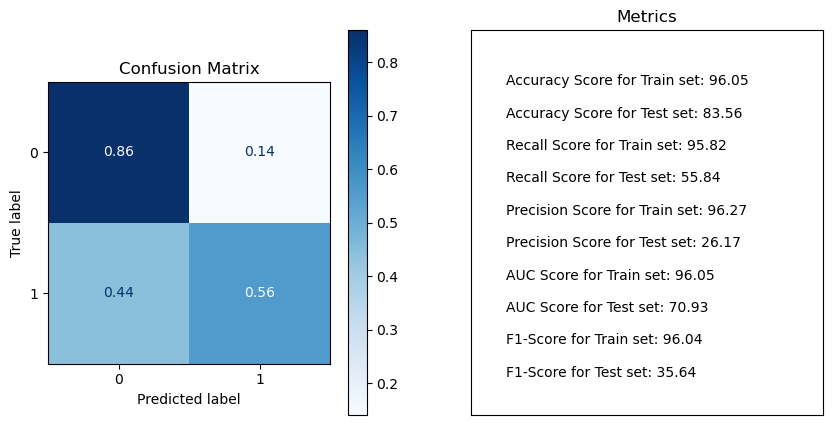

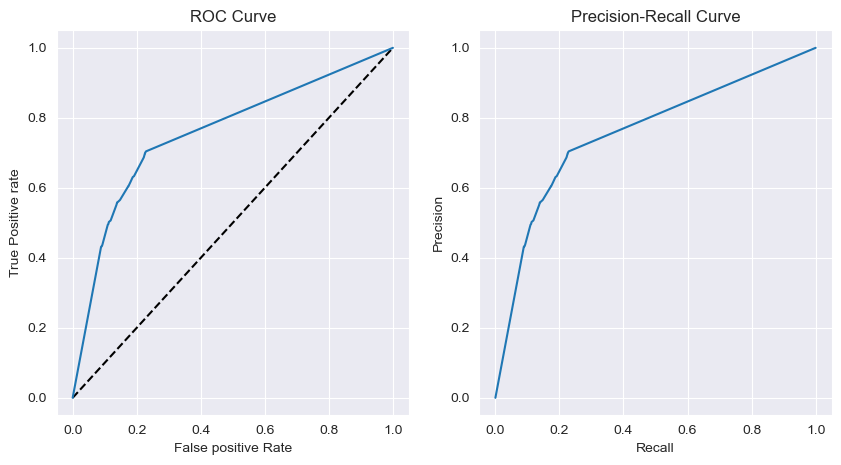

In [117]:
# fit and predict Decision Tree model to dataset obtained through PCA
y_train_pred,y_test_pred,y_pred_proba,dec_tree_model= fit_predict(dec_tree,hyperparameters,'pca')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_pca,dec_tree_model)

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree PCA")

## RANDOM FOREST

In [118]:
#List Hyperparameters that we want to tune.
min_samples_split = [10,15,20]
min_samples_leaf = [5,10,15]
n_estimators= [50,100,150]

#Convert to dictionary
hyperparameters = dict(min_samples_split=min_samples_split, \
                       min_samples_leaf=min_samples_leaf,\
                       n_estimators=n_estimators)

#create an instance of randomforest
randm_frst=RandomForestClassifier(random_state=randm_st,n_jobs=-1)

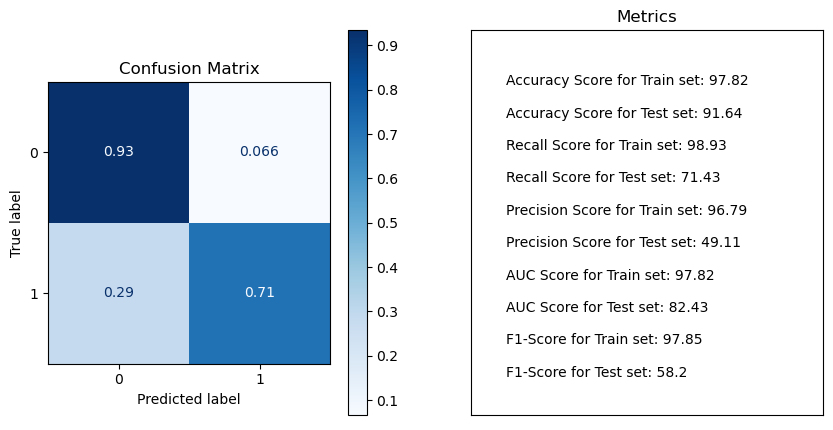

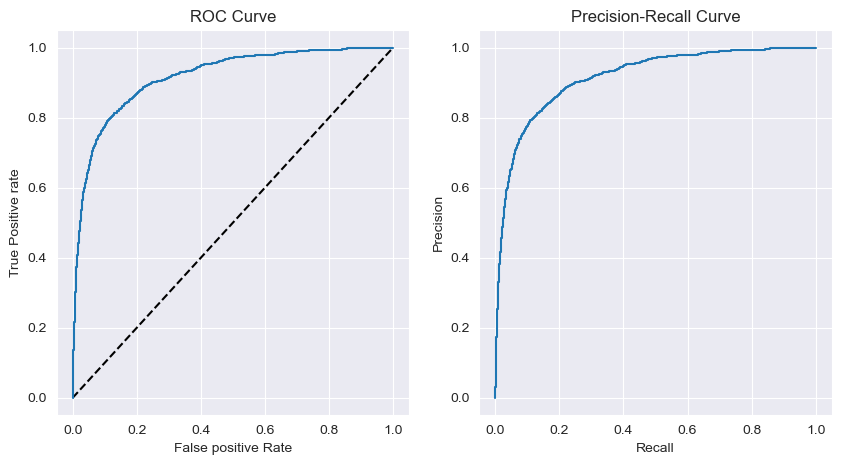

In [119]:
# fit and predict Random Forest model to dataset obtained through RFE
y_train_pred,y_test_pred,y_pred_proba,randm_frst_model= fit_predict(randm_frst,hyperparameters,'rfe')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_rfe,randm_frst_model)

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest RFE")

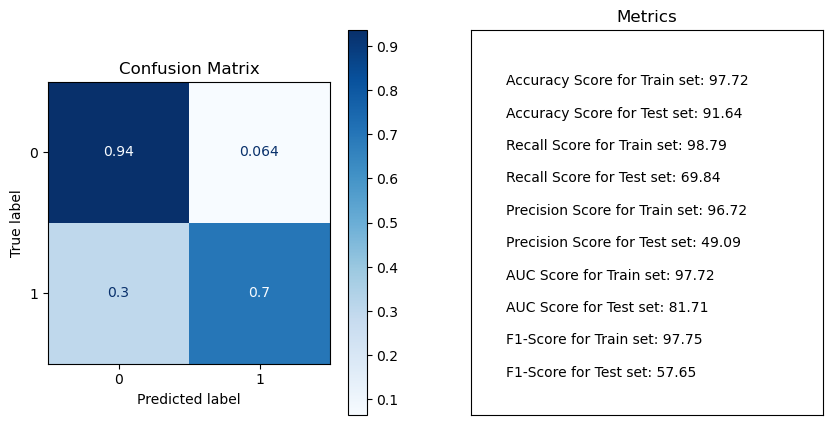

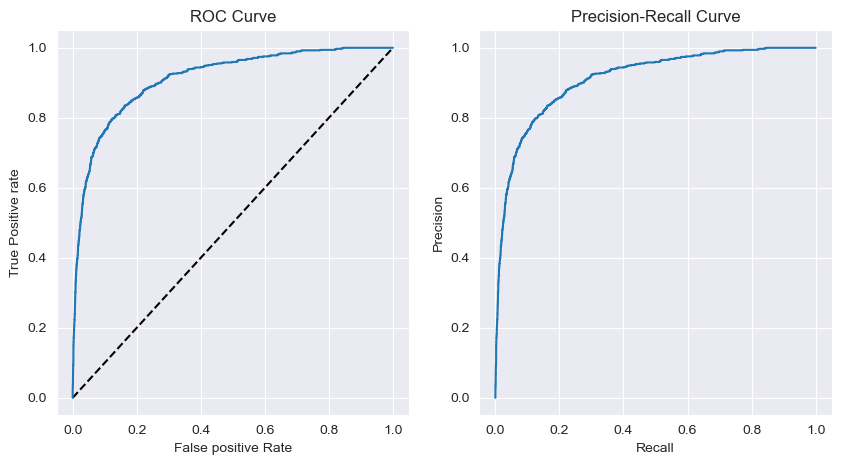

In [120]:
# fit and predict Random Forest model to dataset obtained through VIF
y_train_pred,y_test_pred,y_pred_proba,randm_frst_model= fit_predict(randm_frst,hyperparameters,'vif')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_vif,randm_frst_model)

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest VIF")

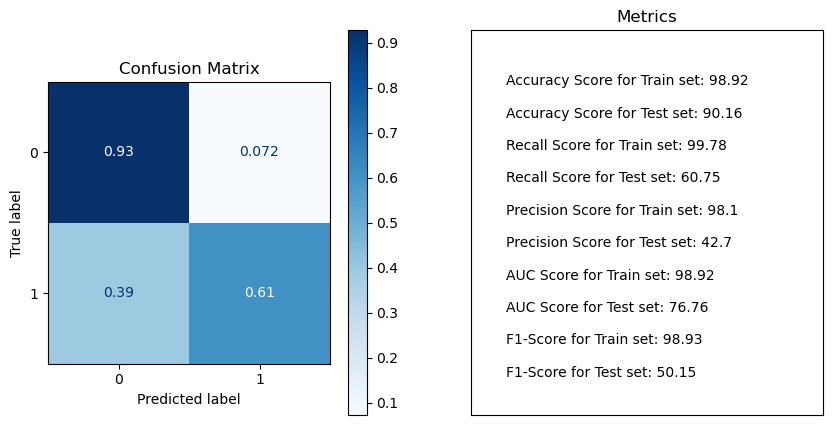

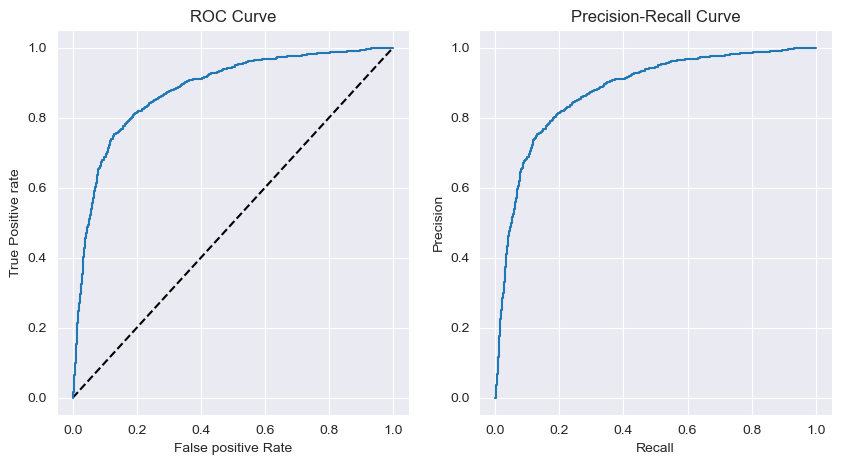

In [121]:
# fit and predict Random Forest model to dataset obtained through PCA
y_train_pred,y_test_pred,y_pred_proba,randm_frst_model= fit_predict(randm_frst,hyperparameters,'pca')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_pca,randm_frst_model)

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest PCA")

## GRADIENT BOOSTING

In [122]:
#List Hyperparameters that we want to tune.
n_estimators= [50,100,150]
learning_rate = [0.1,0.5,1]
max_depth = [2,3,4]

#Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators,\
                      max_depth=max_depth,\
                      learning_rate=learning_rate)

grd_bst = GradientBoostingClassifier(random_state=randm_st)

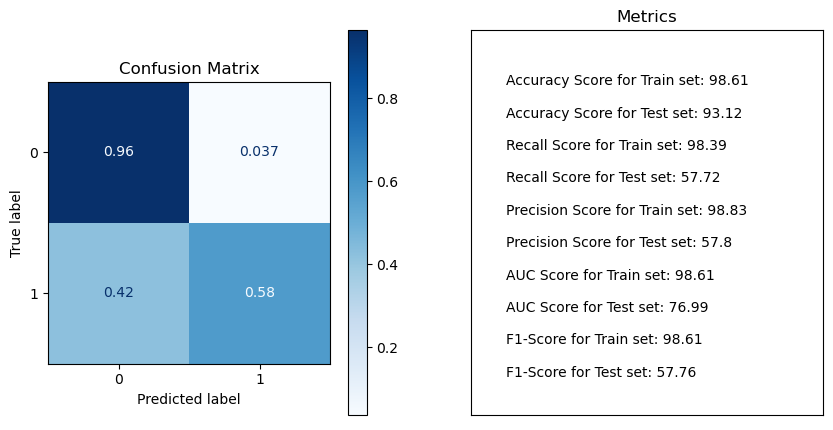

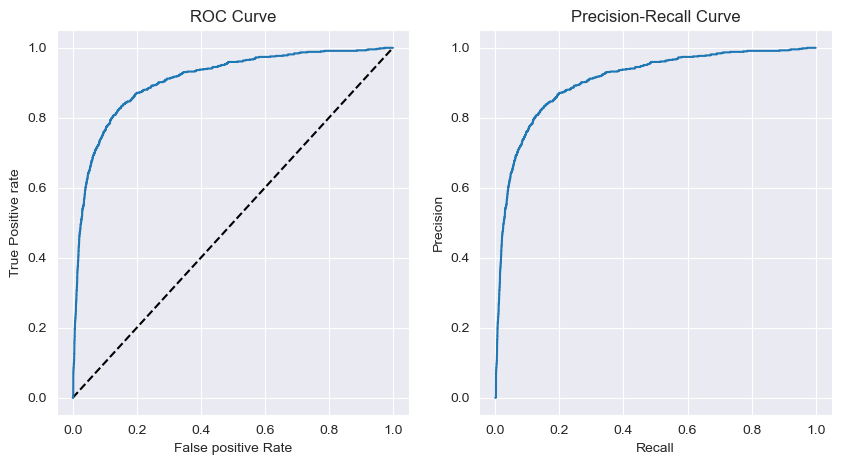

In [123]:
# fit and predict Gradient Boost model to dataset obtained through RFE
y_train_pred,y_test_pred,y_pred_proba,grd_bst_model= fit_predict(grd_bst,hyperparameters,'rfe')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_rfe,grd_bst_model)

# plot a ROC cure and Precision-recall curve for the Gradient Boost Model
roc_curve_prec_curve("Gradient Boost RFE")

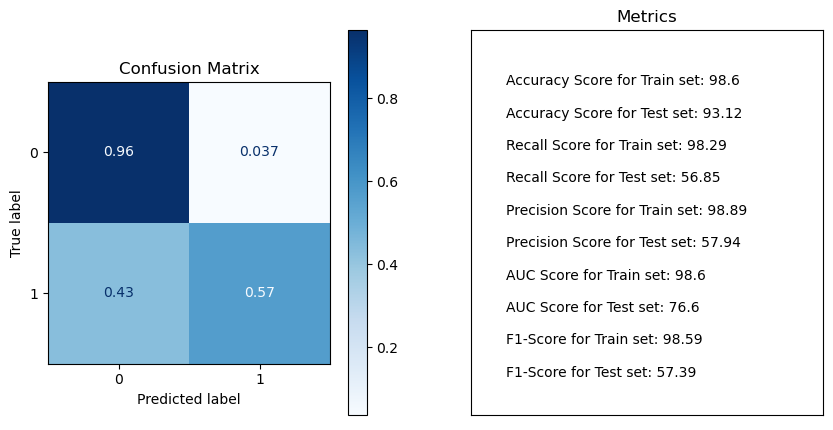

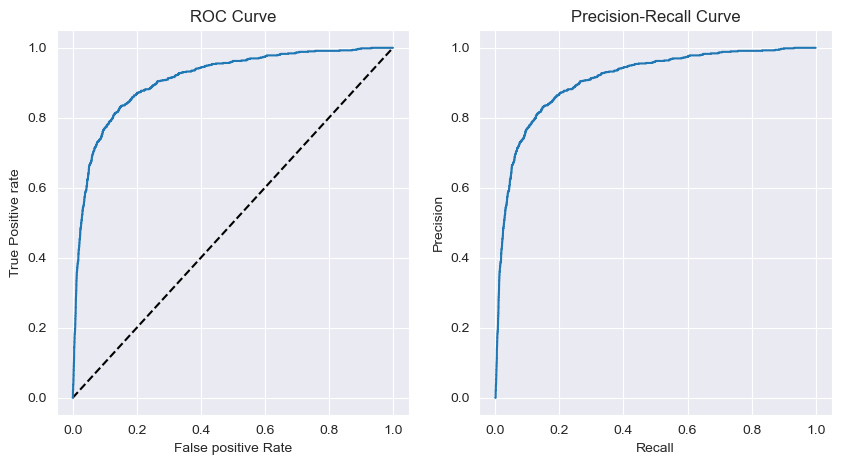

In [124]:
# fit and predict Gradient Boost model to dataset obtained through VIF
y_train_pred,y_test_pred,y_pred_proba,grd_bst_model= fit_predict(grd_bst,hyperparameters,'vif')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_vif,grd_bst_model)

# plot a ROC cure and Precision-recall curve for the Gradient Boost Model
roc_curve_prec_curve("Gradient Boost VIF")

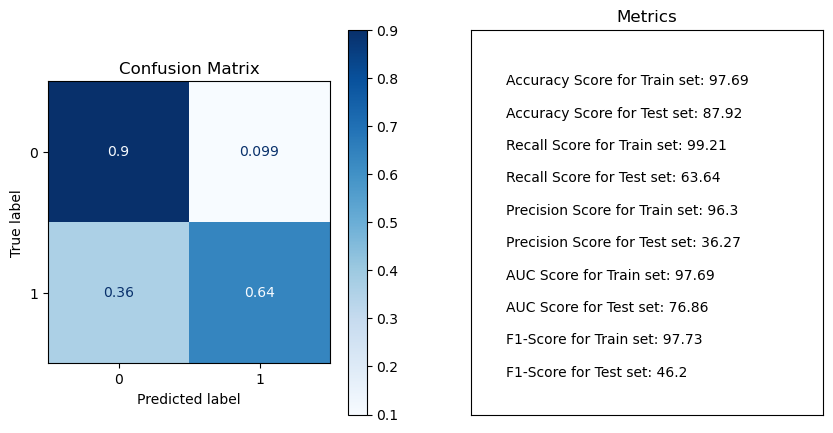

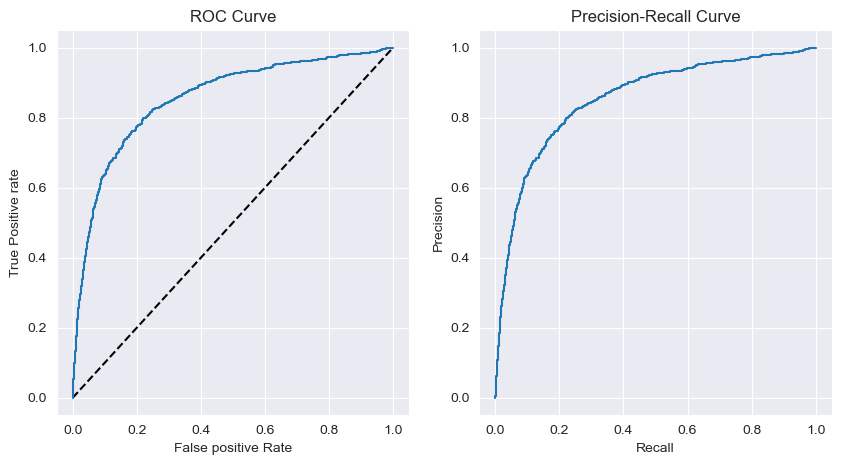

In [125]:
# fit and predict Gradient Boost model to dataset obtained through PCA
y_train_pred,y_test_pred,y_pred_proba,grd_bst_model= fit_predict(grd_bst,hyperparameters,'pca')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_pca,grd_bst_model)

# plot a ROC cure and Precision-recall curve for the Gradient Boost Model
roc_curve_prec_curve("Gradient Boost PCA")

## XGBOOSTING

In [126]:
hyperparameters = {  "learning_rate"    : [0.05, 0.1, 0.15],
                     "max_depth"        : [3, 4, 5],
                     "gamma"            : [0.0, 0.2 ,0.4],
                     'eval_metric'      : ['auc'],
                  }

xg_bst = XGBClassifier(random_state=randm_st,n_jobs=-1)

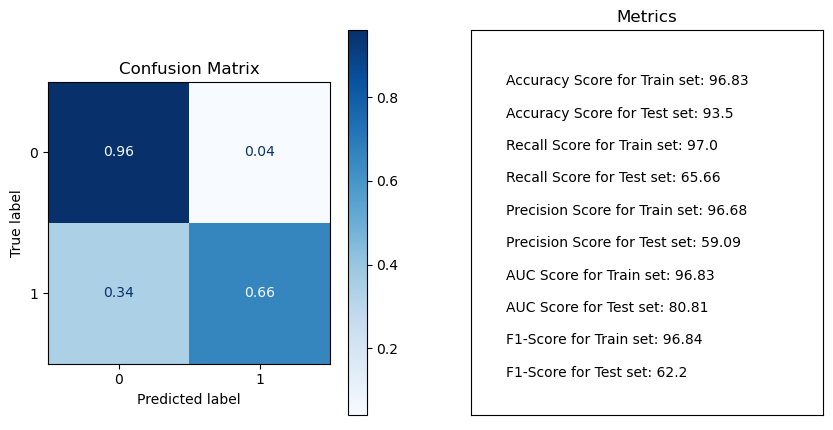

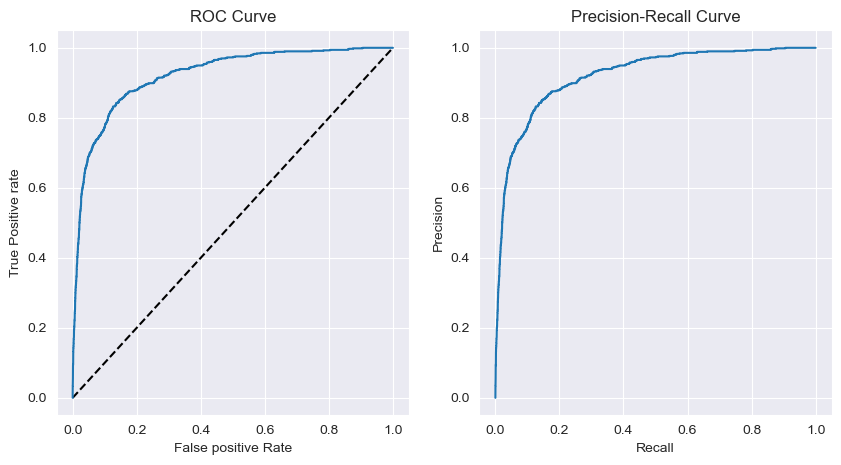

In [127]:
# fit and predict XGBoost model to dataset obtained through RFE
y_train_pred,y_test_pred,y_pred_proba,xg_bst_model= fit_predict(xg_bst,hyperparameters,'rfe')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_rfe,xg_bst_model)

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost RFE")

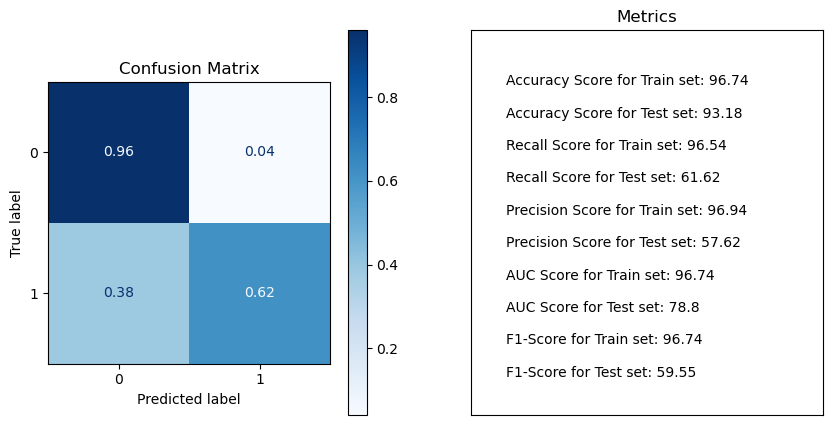

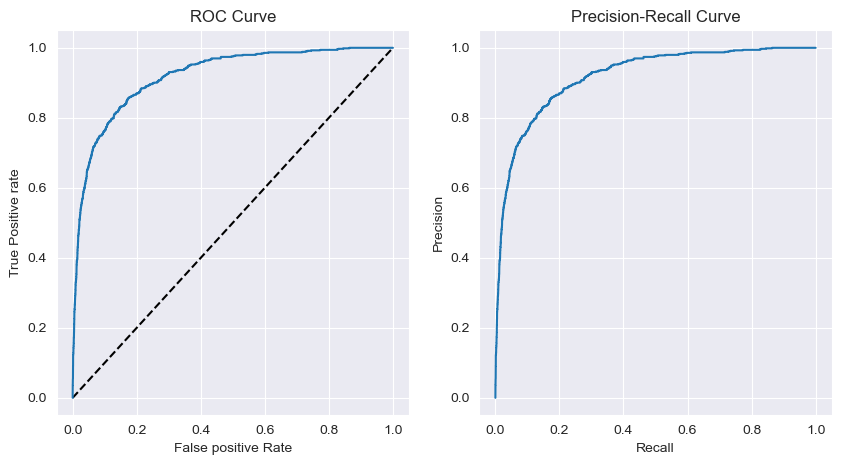

In [128]:
# fit and predict XGBoost model to dataset obtained through VIF
y_train_pred,y_test_pred,y_pred_proba,xg_bst_model= fit_predict(xg_bst,hyperparameters,'vif')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_vif,xg_bst_model)

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost VIF")

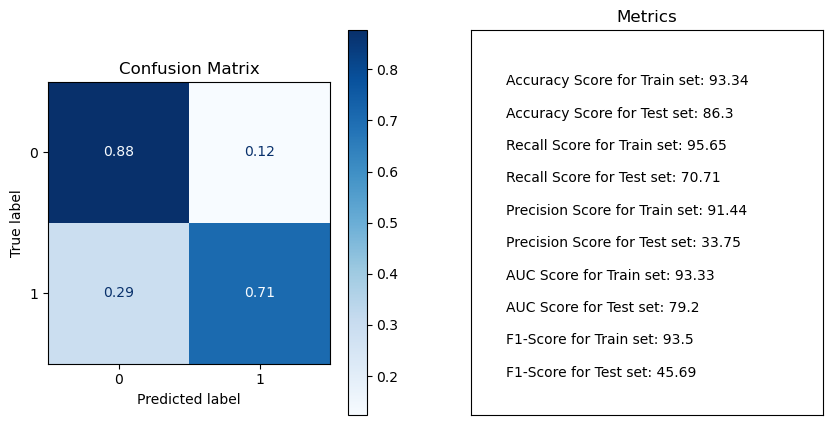

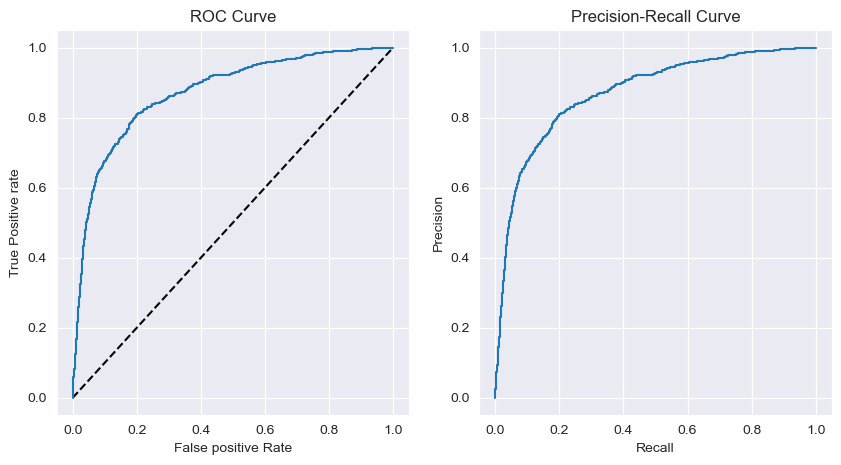

In [129]:
# fit and predict XGBoost model to dataset obtained through PCA
y_train_pred,y_test_pred,y_pred_proba,xg_bst_model= fit_predict(xg_bst,hyperparameters,'pca')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(X_test_pca,xg_bst_model)

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost PCA")

## Modal Summary

##### Creating a Dataframe Table with all the metrics from different models

In [130]:
# Convert the model summary dictionray to DataFrame
model_summary = pd.DataFrame(model_eval).T
model_summary.style.set_properties(
    subset=['Test Recall'], 
    **{'font-weight': 'bold'}
).highlight_max(subset=['Test Recall'], color = 'lightgreen',axis=0)

**We could see that KNN outperforms other models and has a good recall score, Hence Lets take this as our final Model.**

Now that we have identified the final model, lets try different hyperparameters in KNN to see if it improves the model further

### MODEL EVALUATION

#### HYPERPARAMETER TUNING for the best Model : KNN PCA

In [131]:
#List Hyperparameters that we want to tune.
leaf_size = [25,30,35]
n_neighbors = [5,10,15]
metric=['minkowski', 'manhattan_distance']
weights = ['uniform', 'distance']

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size,n_neighbors=n_neighbors,metric=metric,weights=weights)

#create an instance of knn
knn=KNeighborsClassifier(n_jobs=-1)

# set number of folds to 5
split_val=5

# initialzie a StratifiedKFold 
skf = StratifiedKFold(n_splits=split_val, shuffle = True, random_state = randm_st)

# Create a Grid Search CV and making use of already created knn object
knn_grid=GridSearchCV(estimator=knn,param_grid=hyperparameters,cv=skf,scoring='recall', verbose=True)

# fit data obtained through PCA 
knn_grid.fit(X_train_pca,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'leaf_size': [25, 30, 35],
                         'metric': ['minkowski', 'manhattan_distance'],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=True)

In [132]:
# print the grid results
print('\n Best estimator:')
print(knn_grid.best_estimator_)
print('\n Best score:')
print(knn_grid.best_score_)
print('\n Best parameters:')
print(knn_grid.best_params_)


 Best estimator:
KNeighborsClassifier(leaf_size=25, n_jobs=-1, n_neighbors=15,
                     weights='distance')

 Best score:
0.9997812863068244

 Best parameters:
{'leaf_size': 25, 'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}


In [133]:
#lets now predict on Test and Train data set
y_train_pred=knn_grid.predict(X_train_pca)
y_test_pred=knn_grid.predict(X_test_pca)

In [134]:
# Lets evaluate the model by caltulating all the metrics
metric = calculate_metrics()
metric

{'Train Accuracy': 100.0,
 'Test Accuracy': 71.53,
 'Train Recall': 100.0,
 'Test Recall': 80.81,
 'Train Precision': 100.0,
 'Test Precision': 19.66,
 'Train AUC': 100.0,
 'Test AUC': 75.76,
 'Train F1-Score': 100.0,
 'Test F1-Score': 31.63}

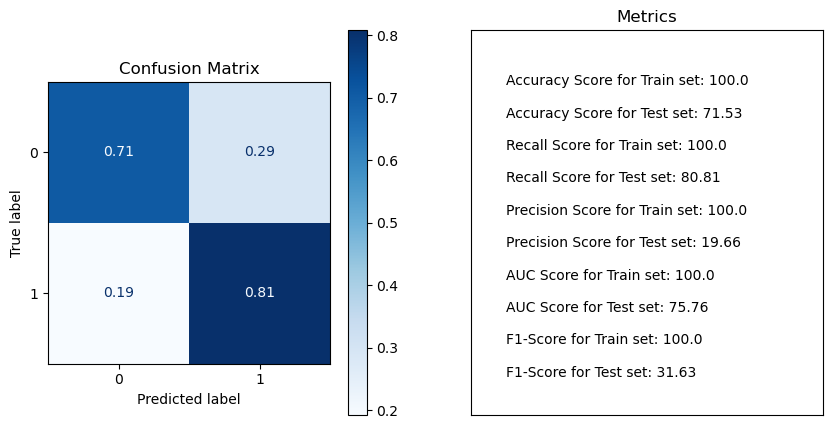

In [135]:
# plot a confusion matirx for model 
confusion_matrix_plot(X_test_pca,knn_grid)

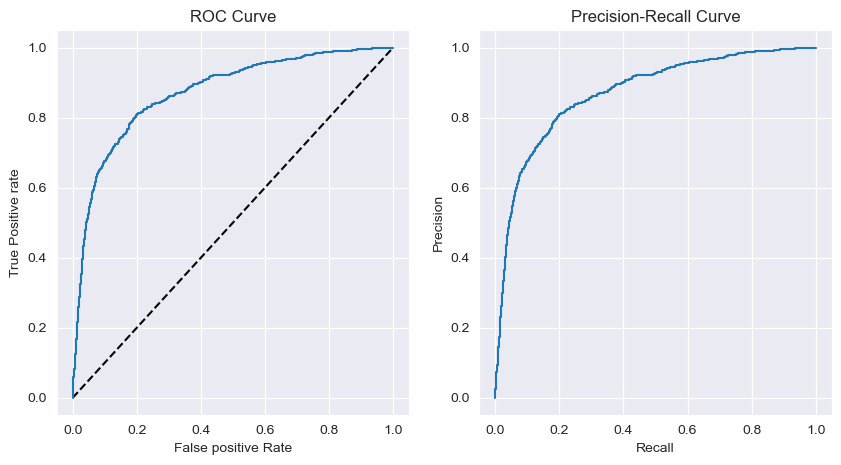

In [136]:
# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("Best Estimator : KNN PCA hypertuned")

**The Final Model produces high Recall Score and good Accuracy as well, hence we recommend this model**

**Now that we have finalised the Model, Lets also make sure we have identify the Probability Cut-off and see if it can be utilised**

We know that the **default Cut-off value is 0.5**, lets see if the same can be used or we could find a better Cut-off with High Specificity

### OPTIMAL PROBABILTY CUTOFF CALCULATION

In [137]:
y_pred_proba = knn_grid.best_estimator_.predict_proba(X_test_pca)

y_pred_df= pd.DataFrame({'actual_churn':y_test, 'churn_Prob':y_pred_proba[:,1]})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0

# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_df[i]= y_pred_df['churn_Prob'].map( lambda x: 1 if x > i else 0)

    
#y_pred_df['final_predicted'] = y_pred_df.churn_Prob.map( lambda x: 1 if x > prob else 0)

In [138]:
# lets calculate the accuracy,sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_df['actual_churn'], y_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.423163  0.377240  0.940837
0.1   0.1  0.480071  0.441500  0.914863
0.2   0.2  0.570958  0.542883  0.887446
0.3   0.3  0.613521  0.590886  0.868687
0.4   0.4  0.682069  0.668715  0.832612
0.5   0.5  0.715344  0.707117  0.808081
0.6   0.6  0.765667  0.768945  0.728716
0.7   0.7  0.806820  0.817332  0.688312
0.8   0.8  0.857378  0.880952  0.591631
0.9   0.9  0.889594  0.929980  0.434343


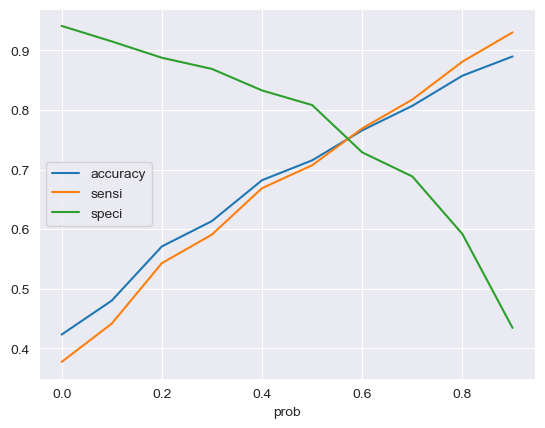

In [139]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci']);

**We see 0.9 is giving better sensitivity, lets try using 0.9 as cut-off**

In [140]:
y_pred_df['final_predicted'] = y_pred_df['churn_Prob'].map( lambda x: 1 if x > 0.9 else 0)
y_test_pred=y_pred_df['final_predicted']

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_df['final_predicted']).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))

# calcuate Accuracy Score for Training data
print("Test Accuracy : "+str(round(accuracy_score(y_test,y_test_pred)*100,2)))


# calculate Recall for Test data
print("Test Recall : "+str(round(recall_score(y_test,y_test_pred)*100,2)))


# calcuate Precision for Test Data
print("Test Precision : "+str(round(precision_score(y_test,y_test_pred)*100,2)))


# calcuate AUC for Test Data
print("Test ROC : "+str(round(roc_auc_score(y_test,y_test_pred)*100,2)))


# calcuate F1-Score for Test Data
print("Test F1-Score : "+str(round(f1_score(y_test,y_test_pred)*100,2)))


TN = 7265, FP = 547, FN = 392, TP = 301


Test Accuracy : 88.96
Test Recall : 43.43
Test Precision : 35.5
Test ROC : 68.22
Test F1-Score : 39.07


In [141]:
y_pred_df['final_predicted'] = y_pred_df['churn_Prob'].map( lambda x: 1 if x > 0.5 else 0)
y_test_pred=y_pred_df['final_predicted']
# Confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_df['final_predicted']).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))

# calcuate Accuracy Score for Training data
print("Test Accuracy : "+str(round(accuracy_score(y_test,y_test_pred)*100,2)))


# calculate Recall for Test data
print("Test Recall : "+str(round(recall_score(y_test,y_test_pred)*100,2)))


# calcuate Precision for Test Data
print("Test Precision : "+str(round(precision_score(y_test,y_test_pred)*100,2)))


# calcuate AUC for Test Data
print("Test ROC : "+str(round(roc_auc_score(y_test,y_test_pred)*100,2)))


# calcuate F1-Score for Test Data
print("Test F1-Score : "+str(round(f1_score(y_test,y_test_pred)*100,2)))


TN = 5524, FP = 2288, FN = 133, TP = 560


Test Accuracy : 71.53
Test Recall : 80.81
Test Precision : 19.66
Test ROC : 75.76
Test F1-Score : 31.63


We See that with **0.9, the No of Churn customers predicted as Non-Churn (FN) increases and Hence we can stick to default cut-off of 0.5 which has lesser FN**

## 2. FEATURE IMPORTANCE

As we are trying to figure out the best features, we can no longer use PCA and hence we use normal train and test data

In [142]:
#create an instance of randomforest
randm_frst=RandomForestClassifier(random_state=randm_st,n_jobs=-1)

#fit the pca train data
randm_frst.fit(X_train,y_train)

#lets now predict on Test data set
y_test_pred=randm_frst.predict(X_test)

# get the prediction probability
y_pred_proba=randm_frst.predict_proba(X_test)

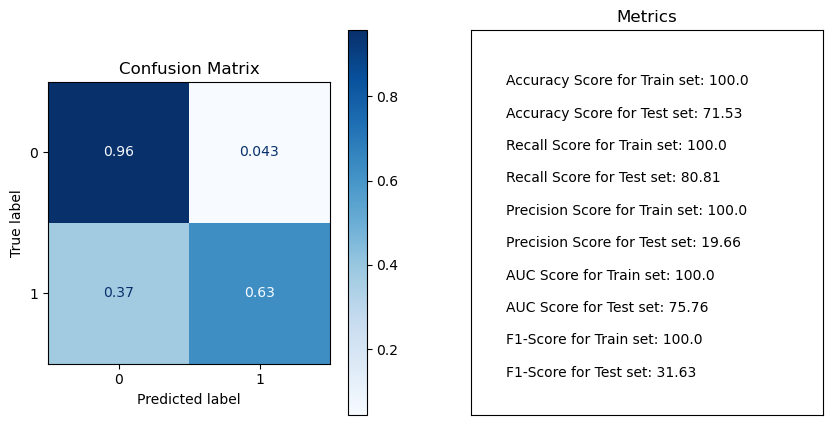

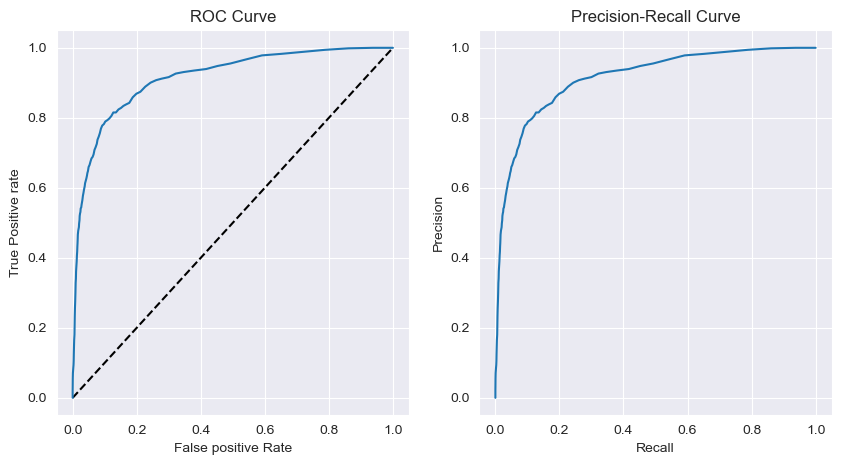

In [143]:
# plot confusion matrix
confusion_matrix_plot(X_test,randm_frst)

# Lets evaluate the model by caltulating all the metrics
metric = calculate_metrics()

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("Random Forest without RFE/VIF/PCA")

In [144]:
feature_imp_df = pd.DataFrame({'Feature':telecom_data.drop(['churn'],axis=1).columns, 'Score':randm_frst.feature_importances_})

# Order the features by max score
feature_imp_df = feature_imp_df.sort_values('Score', ascending=False).reset_index()

#Taking absolute to see the co-eff weightage
feature_imp_df['Abs_Coefficient']=feature_imp_df['Score'].apply(lambda x:np.abs(x))

#sorting based on aboslute co-eff value
feature_imp_df=feature_imp_df.sort_values(by=['Abs_Coefficient'], ascending=False)

feature_imp_df.head(20)

index                    Feature     Score  Abs_Coefficient
0      84       days_since_last_rech  0.096638         0.096638
1      29           loc_ic_t2t_mou_8  0.063877         0.063877
2      60         last_day_rch_amt_8  0.059233         0.059233
3      57             max_rech_amt_8  0.054070         0.054070
4       1                     arpu_8  0.042101         0.042101
5      88                     rech_8  0.034006         0.034006
6      53           total_rech_num_8  0.031345         0.031345
7      82          total_data_rech_8  0.030662         0.030662
8      33           loc_ic_t2f_mou_8  0.029355         0.029355
9      62            max_rech_data_8  0.023695         0.023695
10     89             customer_group  0.016876         0.016876
11     30           loc_ic_t2m_mou_7  0.014980         0.014980
12     10           loc_og_t2f_mou_8  0.014128         0.014128
13     59         last_day_rch_amt_7  0.013040         0.013040
14     85  days_since_last_data_rech  0.012933         0.012933
15     37           std_ic_t2m_mou_8  0.012443         0.012443
16     56             max_rech_amt_7  0.011729         0.011729
17     22               std_og_mou_8  0.011502         0.011502
18     15           std_og_t2t_mou_7  0.010814         0.010814
19     52           total_rech_num_7  0.010593         0.010593

In [145]:
# preivew the impotant features
feature_imp_df.loc[:10,'Feature'].tolist()

['days_since_last_rech',
 'loc_ic_t2t_mou_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'arpu_8',
 'rech_8',
 'total_rech_num_8',
 'total_data_rech_8',
 'loc_ic_t2f_mou_8',
 'max_rech_data_8',
 'customer_group']

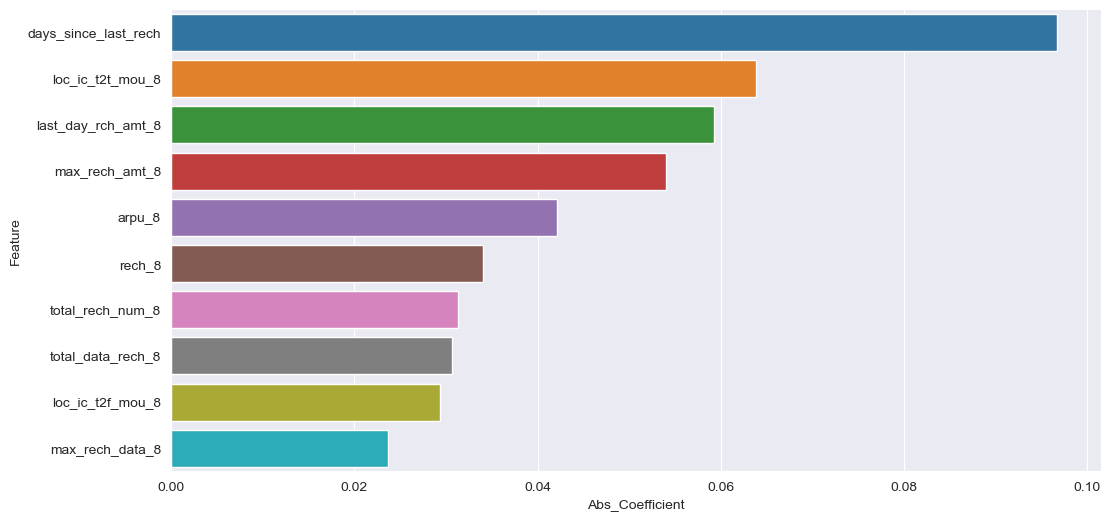

In [146]:
# set figure size
plt.figure(figsize=(12,6))

# create a horizaontal barplot showing the features importance
sns.barplot(y='Feature',x='Abs_Coefficient',data=feature_imp_df[:10])

# show plot
plt.show()

In [147]:
# fetch the top 10 features
feature_imp_df_top_10 = feature_imp_df.loc[:10,:]

# normalize the feature to 100% ratio
feature_imp_df_top_10.Abs_Coefficient = (feature_imp_df_top_10.Abs_Coefficient)/max(feature_imp_df_top_10.Abs_Coefficient)

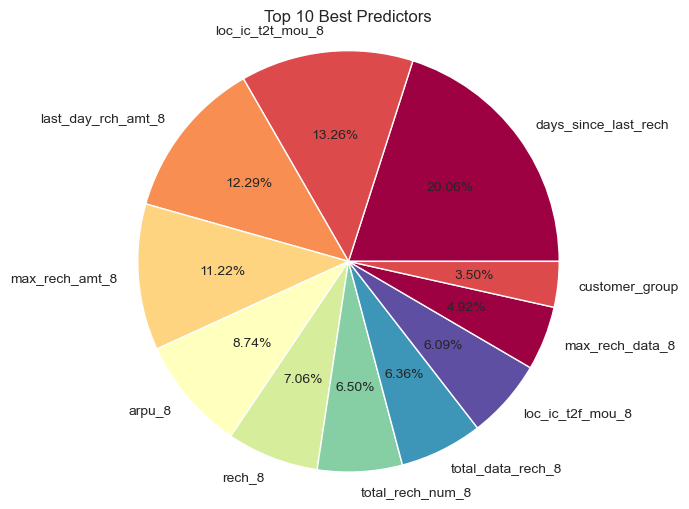

In [148]:
# initialize a color map
cmap = plt.get_cmap('Spectral')

# extract 10 colors for spectral space 
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

# set figure size
plt.figure(figsize=(6,6))

# plot a pie chart for top 10 important features
plt.pie(feature_imp_df_top_10.Abs_Coefficient, labels=feature_imp_df_top_10['Feature'], autopct='%1.2f%%', shadow=False, colors=colors)

# set title
plt.title('Top 10 Best Predictors')

# set axis as equal
plt.axis('equal')

# show plot
plt.show()

### Below are the top 10 features which are high indicators of Churning
 
`1.Days since last recharge:`
 
- If Days since Last recharge is high then the possiblility of user churning will also be high
 
`2.last_day_rch_amt_8:`
 
- Users wanting to churn have lower last day recharge amount over period of 3 months
 
`3.Max Recharge:`
 
- lower the Max recharge amount, higher the churning chances
 
`4.Arpu:`
 
- ARPU decreases over month 6 to 8 indicating the higher chance of churning
 
`5.Total data recharge` and `6.Max Recharge:`
 
- Total recharge number and Max recharge gradually decreases from month 6 to 8 indicating high probability for customers to churn
 
`7. Local Incoming T2F:`
 
- If this Feature is not used by user in good and action phase then chancces of user to churn is very high
 
`8. Days since last data recharge:`
 
- Higher the last data recharge data, higher the possiblity of churning
 
`9.STD Incoming T2M` and `10. STD Outgoing MOU:`
 
- Decrease in Std incoming T2m/ STD outgoing MOU shows possiblity of user turning into a churner

## 3. Recommendation Strategy

As we could see the most important columns are from the 8th Month which decides if the Customer will churn or not.

 

- If the days since last recharge goes beyond 60 days, then the user can be provided with a **recharge discount to attract back the recharge** 

 


- **Providing free caller tunes and free roaming to users having less or no Local Incoming T2F/STD Incoming T2M** can attract users to get back to the network

 


- Users can be provided with a **additional data coupons if they havent recharged for more than 60 days**

 


- Providing **additional talk time to users with steeply reduced Outgoing MOU** will a good chance to opt them out of churning

 


- Continuous Monitoring of High valued ARPU users, with high inactivity, the **Customer service can call the users to check for issues and provide better offers if the user raises a complaint/feedback**